# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Table of Contents

1. [Section 1: Project Definition](#cection1_ProjectDefinition)
    - 1.1. [Project Description](#project_Description)
    - 1.2. [Project Definition](#project_Definition)
2. [Section 2: Data Loading](#section2_DataLoading)
    - 2.1. [Importing Necessary Libraries](#ImportingNecessaryLibraries)
    - 2.1. [Data Loading](#DataLoading)
3. [Section 3: Analysis](#Section3_Analysis)
    - 3.1. [Data Exploration](#Data_Exploration)
    - 3.2. [Data Cleaning](#Data_Cleaning)
    - 3.3. [Data Unification](#Data_Unification)
    - 3.4. [Data Visualization](#Data_Visualization)
    - 3.5. [Offer Response Analysis](#Offer_Response_Analysis)
4. [Section 4: Predictive Modeling](#Section4_PredictiveModeling)
    - 4.1. [Objective](#Objective)
    - 4.2. [Data Preparation](#Data_Preparation)
    - 4.3. [Training Models](#Training_Models)
    - 4.4. [Model Evaluation](#Model_Evaluation)
    - 4.5. [Example of Model Application in Production](#ExampleOfModelApplicationInProduction)
    - 4.6. [Final Conclusions](#Final_Conclusions)
    - 4.7. [Business Benefits of the Model](#Business_BenefitsOfTheModel)
    - 4.8. [Future Steps](#Future_Steps)
5. [Building a Recommendation System for Starbucks Offers](#Building_Recommendation_System_Starbucks_Offers)
    - 5.1. [Benefits of a Recommendation System](#BenefitsRecommendationSystem)
    - 5.2. [Recommender Based on a User-Offer Matrix](#RecommenderBasedOnUserOfferMatrix)
    - 5.3. [Future Steps](#RecommenderFutureSteps)
    - 5.4. [Conclusion](#RecommenderConclusion)
6. [Final Conclusions](#FinalConclusions)

# Section 1: Project Definition
<a id="section1_ProjectDefinition"></a>

## 1.1. Project Description
<a id="project_Description"></a>

This project focuses on analyzing the behavior of Starbucks rewards app users by utilizing historical data from interactions with various promotional offers. The goal is to understand how different user demographic characteristics influence their response to various types of offers, such as Buy One Get One (BOGO), discounts, and informational offers. The ultimate objective is to develop predictive models and recommendation systems to personalize offers, thereby maximizing their effectiveness.

## 1.2. Problem Definition
<a id="project_Definition"></a>

The primary issue addressed in this project is identifying which user characteristics, such as age, gender, and income level, are correlated with a higher likelihood of completing specific promotional offers. By personalizing these offers according to demographic profiles, we can significantly increase the completion rate, thus enhancing customer engagement and loyalty. This understanding is crucial for optimizing marketing strategies and offer distribution.

# Section 2: Data Loading
<a id="section2_DataLoading"></a>

## 2.1. Importing Necessary Libraries
<a id="ImportingNecessaryLibraries"></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity


## 2.2. Data loading
<a id="DataLoading"></a>

In [2]:
# read in the json files
portfolio_df = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile_df = pd.read_json('data/profile.json', orient='records', lines=True)
transcript_df = pd.read_json('data/transcript.json', orient='records', lines=True)

# Section 3: Analysis
<a id="Section3_Analysis"></a>

## 3.1. Data Exploration
<a id="Data_Exploration"></a>

### Data Description

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


### Portfolio Table Analysis
In this part of the analysis of the portfolio_df table, various operations are carried out to understand the structure and content of the available offers data.

#### Visualization of the First Records
The first rows of the DataFrame are displayed to provide an overview of how the data is structured.

In [3]:
portfolio_df.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


#### Table Dimensions
The number of rows and columns in the DataFrame is displayed.

In [4]:
portfolio_df.shape

(10, 6)

There are 10 records (offers) and 6 features for each offer in the table. This is a relatively small and manageable dataset for analysis.

#### Checking for Null Values
The DataFrame is checked for null values.

In [5]:
portfolio_df.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

There are no null values in any of the columns of the DataFrame, which is positive as it means there is no need for data imputation or removal of incomplete records.

#### Statistical Summary
Provides basic descriptive statistics for the numerical columns.

In [6]:
# Statistical summary of the portfolio table
portfolio_df.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


- Reward: The average value is 4.2, with a minimum of 0 and a maximum of 10. This indicates that most offers have a low reward, with a few offering high rewards.
- Difficulty: The average difficulty is 7.7, with a range from 0 to 20. This suggests that there is considerable variability in the difficulty of the offers.
- Duration: The average duration of the offers is 6.5 days, with a standard deviation of 2.32, indicating that most offers have a similar duration, with some exceptions.

#### Frequency of Offer Types
Counts the number of occurrences of each offer type.

In [7]:
# Frequency of each type of offer
portfolio_df['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

There are three types of offers: "bogo," "discount," and "informational." The "bogo" and "discount" offer types are equally represented with 4 offers each, while there are 2 offers of the "informational" type. This suggests that the company has a relatively balanced approach between "buy one, get one free" promotions and discounts, with less emphasis on informational offers.

#### General Conclusion

This initial analysis of the offers table (portfolio_df) provides an overview of the characteristics of the available offers and their distribution. This is useful for understanding the types of promotions the company is offering and how they might influence customer behavior. Additionally, the absence of null values and the distribution of features ensure good data quality, facilitating subsequent analyses and the construction of predictive models.

### Profile Table Analysis
In this part of the analysis of the profile_df table, various operations are carried out to understand the structure and content of the users' demographic data.

#### Visualization of the First Records

The first rows of the DataFrame are displayed to provide an overview of how the data is structured.

In [8]:
profile_df.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


#### Table Dimensions
Displays the number of rows and columns in the DataFrame.

In [9]:
profile_df.shape

(17000, 5)

There are 17,000 records (users) and 5 features for each user in the table. This represents a relatively large dataset, which can provide a solid basis for demographic analysis.

#### Checking for Null Values
Checks for null values in the DataFrame.

In [10]:
profile_df.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

There are 2,175 null values in the columns gender and income. This suggests that a significant portion of the records lacks gender and income information, which could impact subsequent analysis and modeling. The became_member_on column does not contain any null values, which is positive as it can be used to analyze the tenure of the users.

#### Statistical Summary
Provides basic descriptive statistics for the numerical columns.

In [11]:
# Statistical Summary of the profile_df Table
profile_df.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


- Age: The average age is 62.5 years, with a minimum of 18 and a maximum of 118. This wide range suggests the presence of outliers, especially considering that some users have unusually high ages.
- Income: The average income is approximately 65,405, with a range from 30,000 to 120,000. The standard deviation is around 21,598, indicating significant variability in users' incomes.
- Membership Date: Users joined at dates ranging from 2013 to 2018, with an average around 2017. This suggests that most users have been using the app for several years.

#### Count of Unique Values in the 'gender' Column
Counts the number of occurrences of each gender, including null values.

In [12]:
# Count of Unique Values in the 'gender' Column
profile_df['gender'].value_counts(dropna=False)

M       8484
F       6129
None    2175
O        212
Name: gender, dtype: int64

The gender distribution is as follows: 8,484 users identify as "M" (male), 6,129 as "F" (female), and 2,175 have unspecified gender. The "None" category represents a significant number of records without gender data, which may require imputation or special handling in subsequent analyses.

#### General Conclusion

This analysis of the profile_df table provides an overview of the users' demographic characteristics and the data quality. The presence of null values and outliers is notable and may require data cleaning or value imputation. Additionally, differences in age and income can be important for segmenting users and personalizing offers. Lastly, the users' tenure on the platform could be a significant factor in evaluating loyalty and purchasing behavior.

### Transcript Table Analysis
In this part of the analysis, we examine the transcript_df table, which contains records of user interactions with offers and transactions.

#### Visualization of the First Records
The first rows of the DataFrame are displayed to understand the structure and content of the data.

In [13]:
transcript_df.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


#### Table Dimensions

Displays the number of rows and columns in the DataFrame.

In [14]:
transcript_df.shape

(306534, 4)

The table contains 306,534 records and 4 columns, indicating a large number of recorded events. This provides a robust dataset for analyzing user behavior concerning offers and transactions.

#### Checking for Null Values
Checks for null values in the DataFrame.

In [15]:
transcript_df.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

No null values were found in the columns 'person', 'event', 'value', and 'time'. This is positive as it indicates that the data is complete and there is no need for imputing missing values in this table.

#### Summary of Different Types of Events
Counts the frequency of each event type.

In [16]:
# Summary of Different Types of Events
transcript_df['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

- Transaction: 138,953 recorded transactions, representing the number of times users made a purchase.
- Offer Received: 76,277 offers received, indicating how many times users received an offer.
- Offer Viewed: 57,725 offers viewed, showing how many of the received offers were actually seen by users.
- Offer Completed: 33,579 offers completed, representing the number of offers that users took advantage of.

These counts help to understand the lifecycle of an offer from when it is received to when it is completed. It is notable that not all received offers are viewed or completed, suggesting potential opportunities for improvement in the personalization and presentation of the offers.

#### Summary of Times for Different Events
Provides basic descriptive statistics for the 'time' column.

In [17]:
# Summary of Times for Different Events
transcript_df['time'].describe()

count    306534.000000
mean        366.382940
std         200.326314
min           0.000000
25%         186.000000
50%         408.000000
75%         528.000000
max         714.000000
Name: time, dtype: float64

This information is useful for understanding the lifecycle of offers and transactions, as well as identifying behavioral patterns over time.

#### General Conclusion

This analysis of the transcript_df table provides a comprehensive view of how users interact with offers and perform transactions. The data suggests significant variability in the reception, viewing, and completion of offers. Additionally, the absence of null values facilitates more reliable analysis. Understanding these patterns can help optimize marketing strategies and improve offer personalization to maximize user engagement and conversions.

## 3. 2. Data Cleaning
<a id="Data_Cleaning"></a>

In this section, data transformations and cleaning are carried out to ensure that the dataset is ready for in-depth analysis and the construction of predictive models. By removing unusual data, converting columns to appropriate formats, and creating meaningful categories, the quality of the data is improved, facilitating subsequent analysis. These steps are fundamental for a better understanding of customer characteristics and behavior, which is essential for any type of business analysis and decision-making.

### Portfolio Data Cleaning
In this section, the data from the portfolio_df table is cleaned and prepared for use in analysis and predictive modeling.

#### Separation of Channels into Individual Columns
The channels column is used to create individual columns for each channel (email, mobile, social, web). Each offer can be communicated through different channels.

This process of data cleaning and transformation is crucial for preparing the data for analysis and the construction of predictive models. By breaking down the communication channels into individual columns, it allows for a more detailed and accurate analysis of how each channel influences the customer's response to the offers. This data preparation also facilitates the application of predictive modeling techniques, such as classification and regression algorithms, by providing a clearly defined and ready-to-analyze set of features.

In [18]:
# We carry out the separation of the channels into individual columns
channels_dummies = portfolio_df['channels'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
channels_dummies = channels_dummies.astype(int)  # We convert the values to integers

# We added the prefix "channel_" to the names of the new columns.
channels_dummies.columns = ['channel_' + col for col in channels_dummies.columns]

# We concatenate the new columns with the original DataFrame.
portfolio_df = pd.concat([portfolio_df, channels_dummies], axis=1)

#We remove the original 'channels' column.
portfolio_df.drop('channels', axis=1, inplace=True)

portfolio_df.head(10)

,reward,difficulty,duration,offer_type,id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


### Profile Data Cleaning
In this section, several data cleaning and transformation tasks are performed on the profile_df DataFrame to ensure the data is in a suitable format for analysis and modeling.

#### Filtering Rows with Unusual Values
Rows with 'gender = None', 'age = 118', and 'income = NaN' are identified. These conditions suggest that the data in these records is atypical or possibly erroneous. Filtering out these anomalous data points is crucial to avoid biases in analyses and predictive models, as these values can distort conclusions and reduce the accuracy of the models.

In [19]:
# We filter out the rows that meet the three conditions.
filtered_rows = profile_df[(profile_df['gender'].isna()) &
                           (profile_df['age'] == 118) &
                           (profile_df['income'].isna())]

# We count the number of rows that meet the conditions.
count = len(filtered_rows)

print(f"Number of rows with gender=None, age=118, and income=NaN: {count}")

Number of rows with gender=None, age=118, and income=NaN: 2175


The number of rows with NaN values matches the rows with 'gender=None', 'age=118', and 'income=NaN', so we remove these rows.

In [20]:
profile_df = profile_df[~((profile_df['gender'].isna()) &
                          (profile_df['age'] == 118) &
                          (profile_df['income'].isna()))]

#### Conversion of became_member_on to Date Format
This transformation allows for temporal analyses, such as the duration of membership or trends in acquiring new members. It is useful for understanding customer behavior over time.

In [21]:
# Convert 'became_member_on' to a string to facilitate manipulation
profile_df['became_member_on'] = profile_df['became_member_on'].astype(str)

# Create the new column 'date' containing only the year and month
profile_df['became_member_on_date'] = profile_df['became_member_on'].str[:6]

# We change the format of the 'date' column to YYYY-MM
profile_df['became_member_on_date'] = pd.to_datetime(profile_df['became_member_on_date'], format='%Y%m').dt.to_period('M')

# We remove the original 'became_member_on' column
profile_df.drop('became_member_on', axis=1, inplace=True)

profile_df.head()

,gender,age,id,income,became_member_on_date
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018-04
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11


#### Creation of Income Categories
Income categories (income_group) are created by dividing the income into several ranges (30K-60K, 60K-90K, etc.).

Categorizing income facilitates the analysis of offer responses at different income levels, allowing for more precise and effective segmentation in marketing campaigns.

In [22]:
# Create income categories
income_bins = [0, 30000, 60000, 90000, 120000]
income_labels = ['<30K', '30K-60K', '60K-90K', '90K+']
profile_df['income_group'] = pd.cut(profile_df['income'], bins=income_bins, labels=income_labels, right=False)
profile_df.head()

,gender,age,id,income,became_member_on_date,income_group
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07,90K+
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05,90K+
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018-04,60K-90K
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02,30K-60K
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11,30K-60K


#### Definition of Age Ranges and Creation of Labels
Age ranges are defined, and corresponding labels (age_group) are created, such as 18-29, 30-45, etc.

By segmenting customers into age groups, it becomes possible to analyze how different demographic groups respond to various types of offers. This is crucial for personalizing marketing strategies and maximizing the effectiveness of the offers.

In [23]:
# Define the age ranges and corresponding labels
bins = [0, 30, 45, 60, 75, 90, 120]
labels = ['0-29', '30-44', '45-59', '60-74', '75-89', '90+']

# Create a new column in profile_df that categorizes the age groups
profile_df['age_group'] = pd.cut(profile_df['age'], bins=bins, labels=labels, right=False)

profile_df.head()

,gender,age,id,income,became_member_on_date,income_group,age_group
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07,90K+,45-59
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05,90K+,75-89
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018-04,60K-90K,60-74
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02,30K-60K,60-74
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11,30K-60K,45-59


### Transcript Data Cleaning
In this section, data cleaning and transformation are performed on the transcript_df DataFrame, which contains information about user events related to offers and transactions.

#### extract_value Function
The objective is to extract relevant information from the value column, which contains varied data depending on the type of event.

Process:
- The extract_value function takes each row of the DataFrame and parses the value field to extract specific data such as offer_id, amount, and reward.
- The value is loaded as a dictionary if it is a JSON string.
- Depending on the type of event (event), different values are extracted:
    - offer viewed: Extracts offer_id.
    - transaction: Extracts amount.
    - offer completed: Extracts offer_id and reward.
    - offer received: Extracts offer_id.
- Result: The function returns a series with the extracted values for each row.

In [24]:
# Function to extract values from 'value' depending on the 'event'
def extract_value(row):
    # Load the value of 'value' as a dictionary
    value = row['value']
    if isinstance(value, str):  # If the value is a string, load it as JSON
        value = json.loads(value)
        
    if row['event'] == 'offer viewed':
        return pd.Series([value.get('offer id'), None, None])
    elif row['event'] == 'transaction':
        return pd.Series([None, value.get('amount'), None])
    elif row['event'] == 'offer completed':
        return pd.Series([value.get('offer_id'), None, value.get('reward')])
    elif row['event'] == 'offer received':
        return pd.Series([value.get('offer id'), None, None])
    return pd.Series([None, None, None])

# Apply the function to extract 'offer_id', 'amount', and 'reward'
transcript_df[['offer_id', 'amount', 'reward']] = transcript_df.apply(extract_value, axis=1)

# Remove the original 'value' column if it's no longer needed
transcript_df.drop(columns=['value'], inplace=True)

transcript_df.head(100)

,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN
...,...,...,...,...,...,...
95,7c8479d8241344f6a0c306621e191c75,offer received,0,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN
96,5404741ead9442bdbd4b9aa2273e85af,offer received,0,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN
97,81e9ad5fa55a4884b65e01a5db8f1b4e,offer received,0,ae264e3637204a6fb9bb56bc8210ddfd,NaN,NaN
98,ed46fca6de7042478b411690878dc069,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN


## 3.3. Data Unification
<a id="Data_Unification"></a>

### Data Merging
Combining the three datasets allows for a detailed analysis of user behavior regarding offers, from the moment they receive them to the transactions made. This facilitates the analysis of the effectiveness of offers based on user profiles.

In [25]:
# Merging profile data with transaction and offer data
transcript_df['offer_id'] = transcript_df['offer_id'].astype(str)
portfolio_df['id'] = portfolio_df['id'].astype(str)
profile_df['id'] = profile_df['id'].astype(str)

# Merge transaction data with profile and portfolio data
data = transcript_df.merge(profile_df, left_on='person', right_on='id', suffixes=('', '_profile'))
data = data.merge(portfolio_df, left_on='offer_id', right_on='id', how='left', suffixes=('', '_portfolio'))

data.head()

,person,event,time,offer_id,amount,reward,gender,age,id,income,...,age_group,reward_portfolio,difficulty,duration,offer_type,id_portfolio,channel_email,channel_mobile,channel_social,channel_web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,75-89,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,75-89,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,nan,19.89,NaN,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,75-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,75-89,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,nan,17.78,NaN,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,75-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Duplicate Removal
Removing duplicates is crucial to avoid bias in the analysis. Allowing duplicates could lead to an overestimation of user responses to offers or the transactions made.

In [26]:
# Checking for duplicates in the dataset
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 374


In [27]:
# Remove duplicates
data = data.drop_duplicates()

### Filtering Specific Events
Filtering specific events allows for a more detailed analysis of each type of interaction. For example, it is possible to study how many offers were viewed but not completed, or how many transactions were made without the influence of an offer.

In [28]:
# Filter the received, viewed, and completed offers and transactions
offers_received = data[data['event'] == 'offer received']
offers_viewed = data[data['event'] == 'offer viewed']
offers_completed = data[data['event'] == 'offer completed']

transactions = data[data['event'] == 'transaction']

## 3.4. Data Visualization
<a id="Data_Visualization"></a>

### Portfolio Data Visualization

#### Number of Offers by Channel
The chart shows the number of available offers by distribution channel, classified into four categories: email, mobile, social, and web.

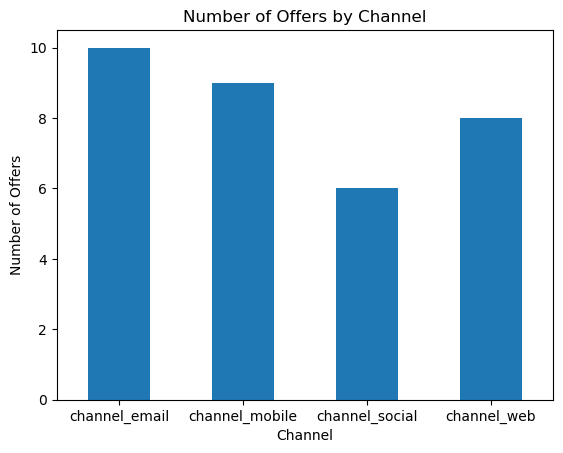

In [30]:
# Number of Offers by Channel
channel_counts = portfolio_df[['channel_email', 'channel_mobile', 'channel_social', 'channel_web']].sum()
channel_counts.plot(kind='bar')
plt.title('Number of Offers by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Offers')
plt.xticks(rotation=0)
plt.show()

##### Interpretation

1. Predominance of Email Channel:

- The email channel is the most utilized, with a total of 10 offers. This suggests that Starbucks' marketing campaigns heavily rely on email to distribute their offers to customers.

2. Significant Use of Mobile and Web:

- Mobile and web are also important channels, with 9 and 8 offers, respectively. This indicates a strong and stable presence on mobile and web platforms, which is expected given the growth of mobile device usage and the importance of maintaining an online presence.

3. Lesser Use of Social Media:

- The social channel has fewer available offers, with a total of approximately 6. This may indicate that Starbucks uses this channel less for distributing offers or that the focus on social media is different, perhaps more oriented towards content generation and user interaction rather than direct offer distribution.

##### Considerations

- Channel Strategy: The distribution of offers may align with Starbucks' marketing strategy, which can vary depending on the type of offer, the campaign's objective, and the customer demographics. It is possible that email campaigns are more effective for certain types of promotions, while social media is used for other marketing activities.

- Complementary Analysis: It would be useful to complement this analysis with the response rate by channel to understand not only the distribution of offers but also their effectiveness in each channel. This would help determine if some channels are more effective than others in capturing customer attention and engagement.

This interpretation helps to understand how Starbucks distributes its offers and which channels are most relied upon to reach its customers.

#### Number of Offers by Offer Type
The chart displays the number of available offers by offer type, classified into three categories: bogo (buy one get one free), discount, and informational.

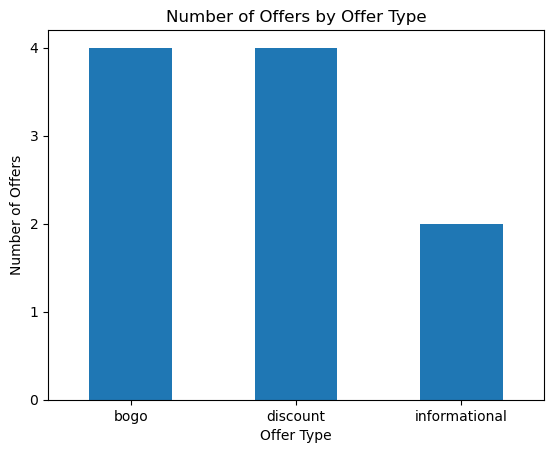

In [31]:
# Number of Offers by Offer Type
offer_type_counts = portfolio_df['offer_type'].value_counts()
ax = offer_type_counts.plot(kind='bar')

plt.title('Number of Offers by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Number of Offers')
plt.xticks(rotation=0)

# Ensure the y-axis displays integer numbers
ax.yaxis.get_major_locator().set_params(integer=True)

plt.show()

##### Interpretation

1. Predominance of BOGO and Discount Offers:

- Both bogo and discount offers have the highest count, with 4 offers each. This suggests that Starbucks is focusing a significant portion of its marketing efforts on promotions that offer a direct purchase incentive, such as discounts and "buy one, get one free" offers.
- These offers are commonly used to attract customers and increase sales volume, especially for popular products or to introduce new ones.

2. Less Use of Informational Offers:

- Informational offers are less frequent, with only 2 available. This type of offer generally provides information about new or existing products without a direct purchase incentive.
- The lower number of informational offers may indicate that Starbucks prefers using more direct and tangible methods to drive sales rather than merely providing information.

##### Considerations

- Incentive Strategy: The distribution of offer types may reflect Starbucks' marketing strategy, which seems to focus on direct incentives (discounts and BOGO) to drive short-term sales.

- Effectiveness Analysis: It would be helpful to complement this analysis with a study of the effectiveness of each type of offer. This could include metrics such as the redemption rate of offers and their impact on customer purchasing behavior.

- Customer Segmentation: Analyzing how different customer segments (e.g., by demographics, purchasing behavior) respond to each offer type could provide valuable insights for personalizing and optimizing future marketing campaigns.

This interpretation helps to understand Starbucks' marketing strategy in terms of the types of offers they prefer to use.

### Profile Data Visualization
#### Histogram of Gender
The chart displays the distribution of user genders in the dataset, classified into three categories: M (male), F (female), and O (other/not specified).

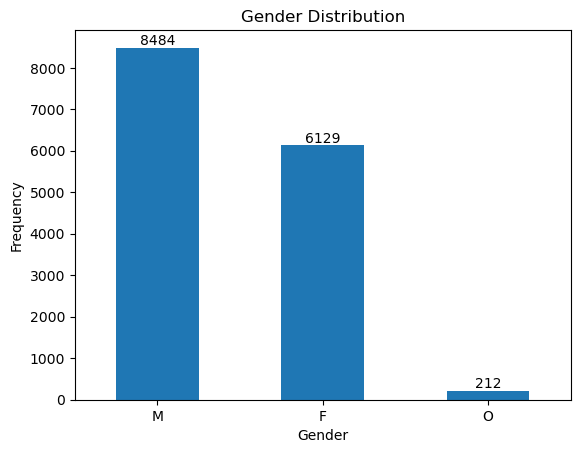

In [32]:
# Histogram of Gender
gender_counts = profile_df['gender'].value_counts()
ax = gender_counts.plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i)

plt.show()

##### Interpretation

1. Predominance of Male Users:

- The M (male) category has the largest representation with 8,484 users, suggesting that a considerable portion of Starbucks rewards app users are men.

2. High Representation of Female Users:

- The F (female) category also has significant representation with 6,129 users. Although fewer than male users, it still constitutes a large proportion of the total.

3. Low Representation of Other Genders:

- The O (other/not specified) category has only 212 users. This category may include individuals who do not identify as male or female or who preferred not to specify their gender.

##### Considerations

- Gender Representation: The significant difference between genders indicates a demographic discrepancy among customers using the app.

- Implications for Marketing Strategy: Given that men seem to be overrepresented compared to other genders, marketing campaigns and offers could be tailored to attract more female or non-binary customers if that is a company goal.

- Customer Segmentation: Gender segmentation can be useful for personalizing offers and promotions, tailoring them to the preferences and behaviors of different gender groups.

##### Additional Analysis

- Response Rate by Gender: It would be interesting to analyze whether there are significant differences in the response rate to offers among different genders. This could provide valuable insights into which types of offers are more effective for each group.

This interpretation highlights the gender composition of app users, which could influence strategic marketing decisions and the personalization of offers.

#### Histogram of Ages
The chart displays the age distribution of users in the dataset.

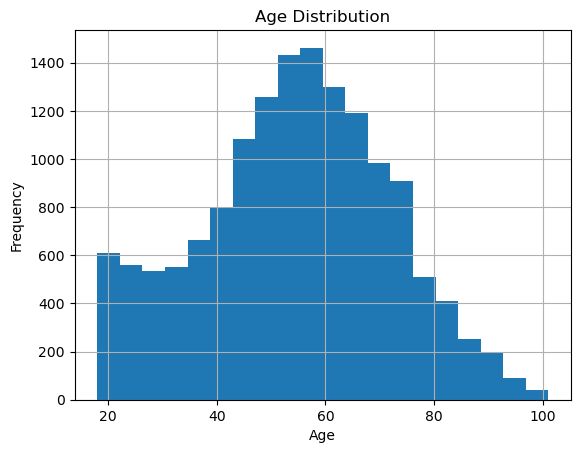

In [33]:
# Histogram of Ages
profile_df['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Interpretation

1. Distribution:

- The age distribution shows a clear peak in the age groups around the 50s and 60s. This is the dominant age group among Starbucks rewards app users.

2. Majority of Users Aged 30 to 70:

- Most users fall within the age range of 30 to 70 years. This may suggest that Starbucks' rewards service is particularly attractive to people in this age group, possibly due to higher purchasing power or consumption habits.

3. Lower Participation of Younger and Older Individuals:

- There is a lower number of younger users (under 30) and older users (over 70). This could be due to a lower affinity with the rewards program or simply differences in consumption habits.

##### Considerations

- Age Segmentation: Given the significant concentration of users in the 30 to 70 age range, marketing strategies and offers could be primarily targeted at this age group.

- Opportunities to Expand the User Base: There may be opportunities to attract younger or older users by tailoring the product offerings and marketing to their specific needs and preferences.

- Relationship with Other Demographic Data: It would be interesting to see how age correlates with other variables such as income or gender to gain a deeper understanding of the user profile.

This interpretation highlights the age structure of users and how it might influence Starbucks' marketing strategies.

#### Income Distribution
The chart displays the distribution of annual incomes of users in the dataset.

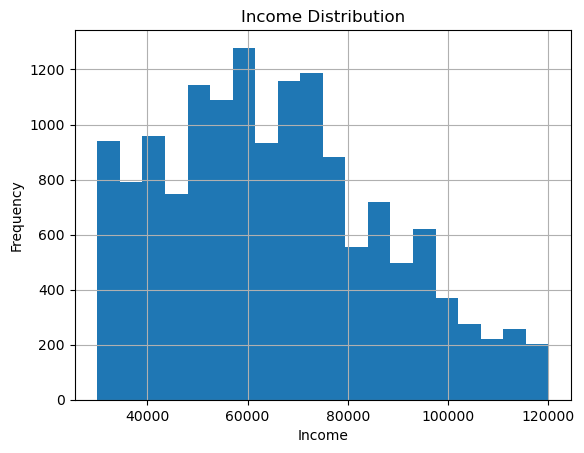

In [34]:
# Income Distribution
profile_df['income'].hist(bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

##### Interpretation

1. Concentration in Middle Income Range:

- Most users have annual incomes ranging between `$40,000` and `$80,000`. This suggests that Starbucks' rewards service is particularly attractive to people within this income range.

2. Lower Representation in Higher Incomes:

- As income increases beyond `$80,000`, the number of users decreases. The lower representation of users with incomes above `$100,000` may indicate that people with higher incomes have different consumption preferences or that Starbucks is perceived more as an everyday, accessible option rather than a luxury experience. It may also indicate less interest in offers from this group.

##### Considerations

- Market Segmentation: Given that a large portion of the user base is in the middle-income range, marketing strategies could focus on this group, emphasizing quality and value in offers and promotions.

- Opportunities for Expansion: There may be opportunities to attract higher-income users by introducing premium products or exclusive experiences that justify a higher price point.

- Analysis: It could be interesting to analyze how income relates to other demographic factors such as age or gender to better understand the characteristics of Starbucks users.

This interpretation provides an overview of the income distribution of Starbucks users and suggests possible strategies to optimize marketing efforts.

#### Age Histogram by Gender
The chart shows the distribution of ages broken down by gender, with the categories Female, Male, and Other/Unspecified.

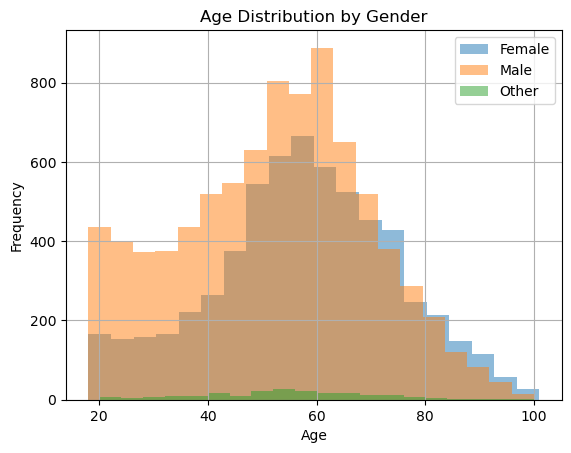

In [35]:
# Age Histogram by Gender
profile_df[profile_df['gender'] == 'F']['age'].hist(bins=20, alpha=0.5, label='Female')
profile_df[profile_df['gender'] == 'M']['age'].hist(bins=20, alpha=0.5, label='Male')
profile_df[profile_df['gender'] == 'O']['age'].hist(bins=20, alpha=0.5, label='Other')
plt.legend()
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Interpretation

1. Male Predominance in Middle Ages:

- There is a notable representation of male users in the middle age groups, particularly in the range of 20 to 70 years.

2. Similar Female Distribution but with Lower Frequency:

- The age distribution for women is similar to that of men, with peaks in the same age ranges, though with generally lower frequency. This suggests that both men and women in these age ranges are interested in Starbucks products and services, but there are more men in the sample.

3. Equality Between Men and Women in Older Ages:

- The number of men and women equalizes around the age of 70, with a slightly higher presence of women in this range.

4. Low Representation of Other Genders:

- The Other category has very low representation across all age groups. This may reflect a small number of users who do not identify as male or female or who prefer not to specify their gender.

##### Considerations

- Segmentation and Personalization: Given that both men and women show similar interest in certain age ranges, marketing campaigns can be tailored to address the needs and preferences of each gender in these groups.

- Exploration of Behavioral Differences: Although age distributions for men and women are similar, it might be useful to explore whether there are differences in purchasing behavior or responses to offers between genders.

This interpretation helps understand how age is distributed by gender among users of the Starbucks rewards app.

#### Income Histogram by Gender
The chart shows the distribution of income broken down by gender, with the categories Female, Male, and Other/Unspecified.

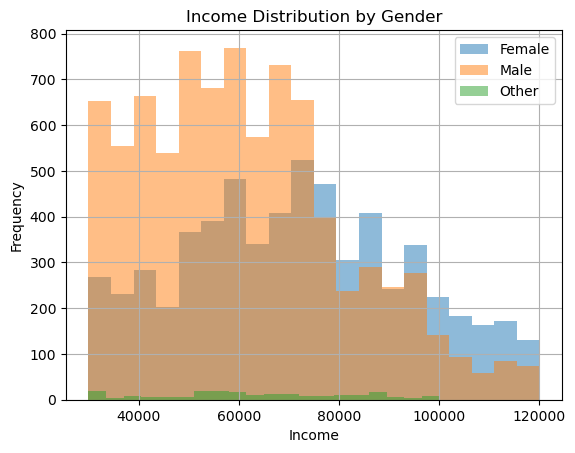

In [36]:
# Income Histogram by Gender
profile_df[profile_df['gender'] == 'F']['income'].hist(bins=20, alpha=0.5, label='Female')
profile_df[profile_df['gender'] == 'M']['income'].hist(bins=20, alpha=0.5, label='Male')
profile_df[profile_df['gender'] == 'O']['income'].hist(bins=20, alpha=0.5, label='Other')
plt.legend()
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

##### Interpretation

1. Male Predominance in Medium-Low Incomes:

- Most male users have incomes in the range of `$40,000` to `$80,000`, with peaks around `$50,000` and `$60,000`. This suggests that men in this income range constitute a significant portion of the user base for the Starbucks rewards app.

2. Similar Distribution for Men and Women in Medium Incomes:

- Both men and women are represented in the income range of `$60,000` to `$80,000`. Although there are more men than women in these income ranges, the distribution is quite similar, indicating that both men and women in this income range are interested in Starbucks products.

3. Greater Female Representation in High Incomes:

- As incomes exceed `$80,000`, there is a higher representation of women compared to men, especially in the range of `$100,000` to `$120,000`. This may suggest that within the group of higher-income users, women are more represented or more likely to use the Starbucks rewards app.

4. Low Representation of Other Genders:

- The Other category has very low representation across all income levels, which could indicate a small user base that does not identify as male or female or prefers not to specify their gender.

##### Considerations

- Market Segmentation: Since income is an important factor in spending capacity, Starbucks could consider designing offers and promotions tailored to different income ranges, taking into account the observed differences between genders.

- Opportunities for Personalization: The higher presence of women in higher income brackets suggests that marketing strategies could be customized for this segment, potentially offering premium products or exclusive experiences.

This interpretation helps understand the relationship between income and gender among users of the Starbucks rewards app, which could influence how the company designs and distributes its offers.

#### Temporal Distribution of 'became_member_on_date'
The chart shows the number of new members registered in the Starbucks rewards program over time, from approximately 2013 to early 2018.

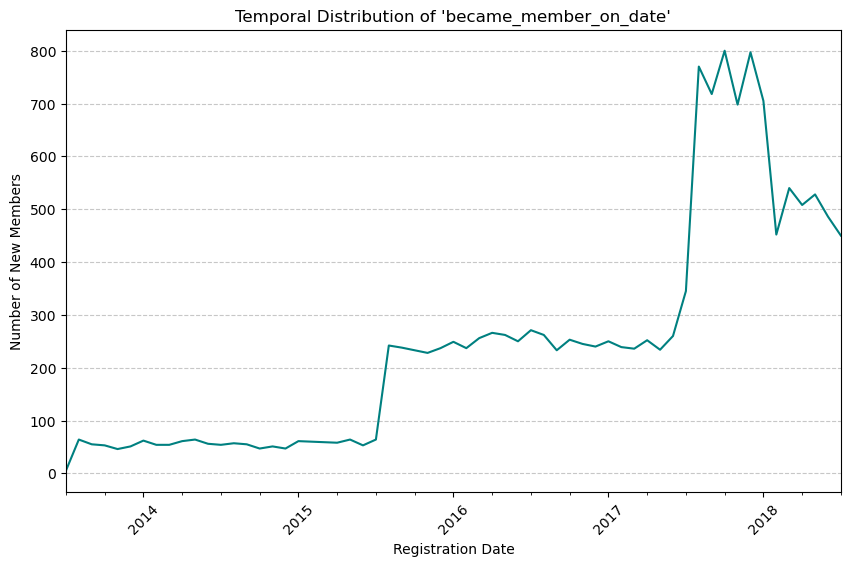

In [37]:
# We group by 'became_member_on_date' and count the occurrences
member_distribution = profile_df['became_member_on_date'].value_counts().sort_index()

# Chart
plt.figure(figsize=(10, 6))
member_distribution.plot(kind='line', color='teal')
plt.title('Temporal Distribution of \'became_member_on_date\'')
plt.xlabel('Registration Date')
plt.ylabel('Number of New Members')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Interpretation

1. Initial Stability (2013 - 2015):

- During the initial period (2013 - mid-2015), the number of new registrations remains relatively stable, with fewer than 100 new members per recorded period. This indicates a slow and steady growth in the number of new members.

2. Notable Increase in 2016:

- In mid-2016, there is a significant increase in the number of new registrations, exceeding 200 new members per period. This increase could be associated with a marketing campaign, a change in the rewards strategy, or the introduction of new features in the Starbucks app.

3. Peak of New Members in 2017:

- In early 2017, there is a considerable surge, with peaks reaching over 700 new members per period. This peak may be due to factors such as special promotions, greater adoption of the app, or market changes that increased interest in the Starbucks rewards program.

4. Decline in 2018:

- In early 2018, there is a decrease in the number of new registrations. Although it remains higher than the initial levels, the decline could indicate market saturation, reduced interest in the program, or improved retention of existing customers, reducing the need for new registrations.

##### Considerations

- Marketing Strategies: The spikes in new member registrations could be correlated with successful marketing campaigns. Analyzing which campaigns were conducted during these periods could provide valuable insights for future strategies.

- Customer Retention: The decline in new registrations in 2018 might indicate a focus on retaining current members. It would be interesting to investigate whether the number of active users remained steady or increased during this period.

- Temporal Analysis: A more detailed analysis of events occurring during growth spikes could help identify best practices and optimize future strategies.

This interpretation suggests that various factors influenced the number of new members over time.

### Transcript  Data Visualization
#### Distribution of Events Over Time
The chart shows the distribution of recorded event times in hours, from the start of the study up to 714 hours, which is the maximum time considered.

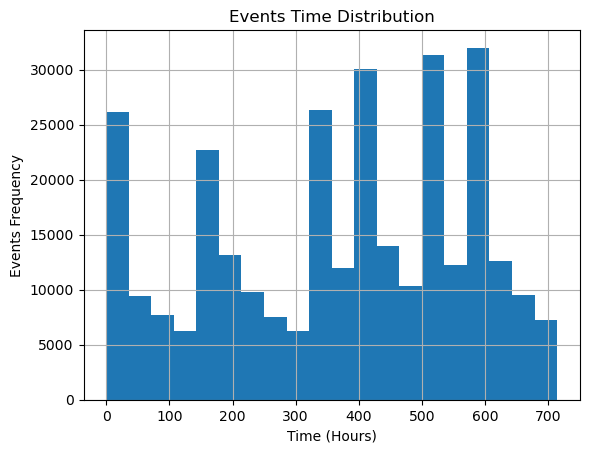

In [38]:
# Histogram of Times (for Visualizing the Distribution of Events Over Time)
transcript_df['time'].hist(bins=20)
plt.title('Events Time Distribution')
plt.xlabel('Time (Hours)')
plt.ylabel('Events Frequency')
plt.show()

##### Interpretation

1. Periodic Pattern of Events:

- The chart shows a periodic pattern with several significant peaks distributed over time. These peaks suggest that there are specific moments when many events are recorded. This behavior may be related to the sending of offers or specific promotions by Starbucks.

2. Concentration of Events at Specific Periods:

- The highest peaks are observed around 100, 300, 500, and 700 hours. This indicates greater activity during these periods, which could correspond with the launch of new promotions, marketing campaigns, or the expiration of certain offers.

3. Low Activity Valleys:

- Between the peaks, there are valleys where the frequency of events is significantly lower. This could reflect a period of time between the launch of new promotions or the conclusion of others, resulting in reduced activity in the app.

##### Considerations

- Promotional Events: The periodicity of the peaks might be related to a strategy of sending promotions at regular intervals. Starbucks may be sending offers every few hours to keep users active and engaged.

- Behavioral Analysis: It would be interesting to investigate which types of events are most frequent during the peaks, such as "offer received" or "transaction." This could provide insight into how users respond to different types of stimuli or promotions.

- Strategy Optimization: Understanding activity patterns can help Starbucks optimize the timing of offer and promotion deliveries to maximize user engagement.

In summary, the chart indicates a well-planned marketing strategy with clearly defined activity peaks, suggesting active management of user interactions.

#### Distribution of Events by Event Type Over Time
The chart shows the distribution of event times broken down by event type (offer received, offer viewed, offer completed, transaction) over the recorded hours. The chart is a stacked visualization, allowing for observation of how different types of events are distributed over time.

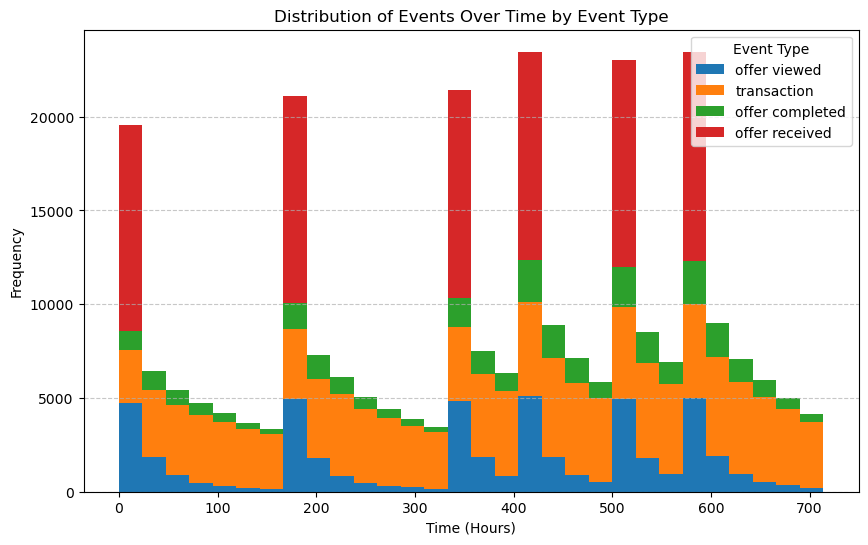

In [39]:
# Filter the data by each event type
# Create the stacked histogram
plt.figure(figsize=(10, 6))
plt.hist([offers_viewed['time'], transactions['time'], offers_completed['time'], offers_received['time']], 
         bins=30, stacked=True, label=['offer viewed', 'transaction', 'offer completed', 'offer received'])
plt.title('Distribution of Events Over Time by Event Type')
plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.legend(title='Event Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Interpretation

1. Periodic Pattern of "Offer Received":

- The most prominent component of the chart is the "offer received" event, represented in red. These peaks occur at regular intervals and are the highest in each period, indicating that offers were sent out regularly and possibly to most users simultaneously. This suggests that Starbucks has a planned schedule for sending offers.

2. "Offer Viewed" and "Transaction" Events Following Offer Sends:

- After the peaks of "offer received," there is an increase in "offer viewed" (in blue) and "transaction" (in orange) events. This indicates that users typically view the offers and make transactions shortly after receiving them. The presence of these actions suggests that offers drive user activity in the app.

3. "Offer Completed" Pattern:

- "Offer completed" events (in green) are relatively less frequent and are more scattered. This may be because not all received offers are completed, or users take more time to meet the offer conditions to complete it.

4. Decrease Between Peaks:

- Between the peaks of "offer received," there is a decrease in the frequency of all event types. This is consistent with the idea that users are more active immediately after receiving offers. As time passes since the offer was sent, activity decreases until the next offer is sent.

##### Considerations

- Marketing Strategy: The periodicity of "offer received" events suggests a planned marketing strategy to keep users engaged at regular intervals. Analyzing the effectiveness of these periods could provide valuable insights into the optimal frequency for sending offers.

- User Engagement: The relationship between "offer viewed" and "transaction" suggests that offers effectively capture users' attention and motivate them to make purchases. Evaluating which types of offers generate more transactions could help optimize future promotions.

- Completing Offers: The low frequency of "offer completed" compared to other events might indicate that improving offer clarity or adjusting conditions could increase the conversion rate.

This interpretation highlights the importance of temporal patterns in user interaction with Starbucks' offers and provides a basis for future marketing strategies.

## 3.5. Offer Response Analysis
<a id="Offer_Response_Analysis"></a>

We conduct two main analyses:

- Response Rate by Offer Type: Analyzes the percentage of each type of offer that was successfully completed.
- Response Comparison Across Demographics: Examines whether there are differences in offer response based on gender, age, or income.

### 3.5.1. Response Rate by Offer Type
The goal here is to calculate the percentage of each type of offer that was successfully completed.

#### Calculation of the Number of Offers Received, Viewed, and Completed by Offer Type

In [40]:
# Calculate the Number of Offers Received, Viewed, and Completed by Offer Type
received_counts = offers_received['offer_type'].value_counts()
viewed_counts = offers_viewed['offer_type'].value_counts()
completed_counts = offers_completed['offer_type'].value_counts()

#### View vs. Received Rate by Offer Type
The chart shows the response rate of offers viewed compared to offers received, broken down by offer type: bogo (buy one get one free), discount, and informational.

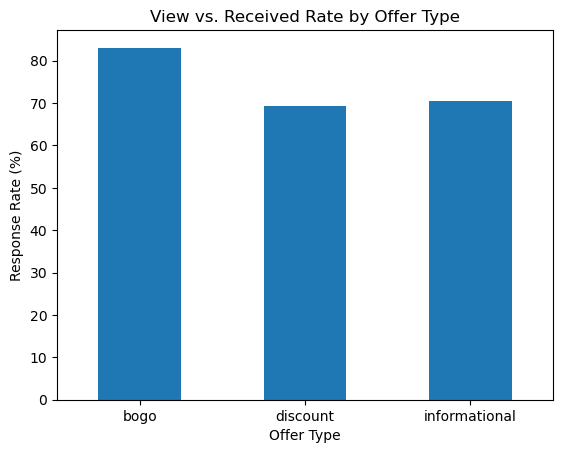

In [42]:
# Calculate the Response Rate
response_rate = (viewed_counts / received_counts) * 100

# Display the Results
response_rate.plot(kind='bar')
plt.title('View vs. Received Rate by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=0)
plt.show()

##### Interpretation

1. High Response Rate for BOGO Offers:

- The response rate for BOGO offers is the highest, exceeding 80%. This suggests that "buy one get one free" offers are highly attractive to users, as a large proportion of those who receive these offers choose to view them. This type of offer seems to be very effective in capturing customers' attention.

2. Moderate Response Rate for Discount Offers:

- Discount offers have a response rate of around 70%. While still effective, they do not reach the level of BOGO offers. This may be because discounts, though appealing, are not as impactful as receiving a free product with the purchase of another.

3. Effectiveness of Informational Offers:

- Informational offers also have a response rate of approximately 70%, similar to discount offers. This is interesting because informational offers do not provide a direct financial incentive (such as a discount or a free item) but instead offer information about products. The high response rate suggests that users are interested in learning about new products or features, which is valuable for Starbucks' marketing strategy.

##### Considerations

- Appeal of BOGO Offers: The high response rate for BOGO offers indicates that this type of promotion is particularly effective. Starbucks might consider increasing the frequency of these offers or combining them with other strategies to maximize user engagement.

- Value of Informational Offers: Although they do not provide a direct benefit, informational offers have a significant impact in attracting user attention. This can be useful for launching new products or communicating important changes to the customer base.

- Effectiveness Comparison: Evaluating the effectiveness of different types of offers in terms of conversion (not just views but also completions) could provide a more comprehensive view of how different offers influence customer behavior.

In summary, the chart suggests that different types of offers have varying levels of effectiveness in capturing user attention. BOGO offers are the most effective, followed closely by informational and discount offers. This information can be useful for designing future marketing campaigns.

#### Completion vs. Received Rate by Offer Type
The chart shows the response rate of offers completed compared to offers received, broken down by offer type: bogo (buy one get one free), discount, and informational.

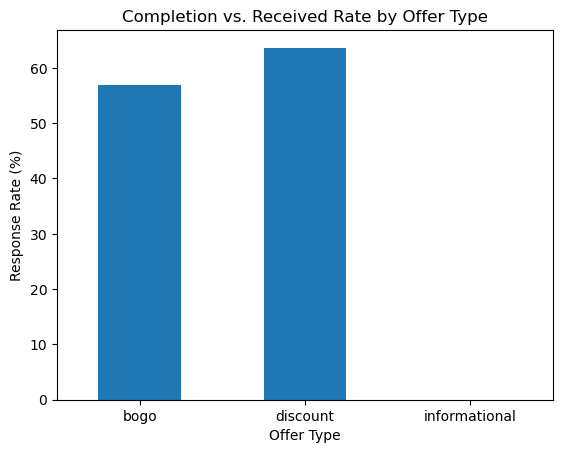

In [43]:
# Calculate the Response Rate
response_rate = (completed_counts / received_counts) * 100

# Display the Results
response_rate.plot(kind='bar')
plt.title('Completion vs. Received Rate by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=0)
plt.show()

##### Interpretation

1. High Completion Rate for Discount Offers:

- Discount offers have the highest completion rate, with around 60% of received offers being completed. This suggests that offers providing direct discounts are very effective at motivating users to make purchases that meet the offer criteria.

2. Good Completion Rate for BOGO Offers:

- BOGO offers also show a high completion rate, though slightly lower than that of discounts, with approximately 55% of received offers being completed. This type of offer, which incentivizes additional purchases, seems effective in boosting sales, though not as much as direct discounts.

3. Lack of Data for Informational Offers:

- No completion rate is shown for informational offers. This is consistent with the nature of these offers, as they generally do not require a specific action to be "completed" (such as making a minimum purchase). Informational offers are typically designed to provide information, and it is not expected that users complete a specific action to receive a direct benefit.

##### Considerations

- Assumption about Informational Offers: As mentioned, it is reasonable to assume that there are no "completion" data for informational offers, as their purpose is purely informational. Therefore, the absence of a bar for informational offers is expected and should not be considered a data error.

- Effectiveness Comparison: Comparing discount and BOGO offers shows that direct discounts might be slightly more motivating for users than BOGO promotions. This could be due to the clarity and simplicity of discount offers.

- Marketing Strategy: Given that discount offers have a slightly higher completion rate, Starbucks might consider using this type of offer more frequently if the goal is to quickly boost sales. However, BOGO offers also have a high degree of effectiveness and can be useful for moving inventory or increasing multi-unit purchases.

In summary, the chart highlights the effectiveness of different types of offers in terms of their ability to be completed by users. The absence of completion data for informational offers is consistent with their non-transactional nature.

#### Completion vs. Viewed Rate by Offer Type
The chart shows the response rate of offers completed compared to offers viewed, broken down by offer type: bogo (buy one get one free), discount, and informational.

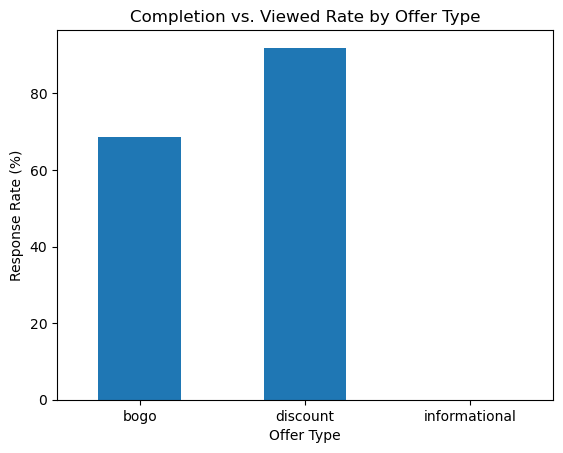

In [44]:
# Calculate the Response Rate
response_rate = (completed_counts / viewed_counts) * 100

# Display the Results
response_rate.plot(kind='bar')
plt.title('Completion vs. Viewed Rate by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=0)
plt.show()

##### Interpretation

1. High Conversion Rate from Viewed to Completed for Discount Offers:

- Discount offers have a very high conversion rate, with approximately 80% of viewed offers being completed. This indicates that users who view a discount offer are highly likely to complete the purchase required to receive the discount. This type of offer not only attracts attention but also motivates action.

2. Good Conversion Rate for BOGO Offers:

- BOGO offers also show a good conversion rate, with around 60% of viewed offers being completed. Although this rate is lower than that of discount offers, it remains quite high, suggesting that this type of promotion is effective in encouraging additional purchases.

3. Absence of Data for Informational Offers:

- As with previous charts, no data is presented for informational offers in terms of completion, which is consistent with their nature. These offers are designed to provide information and do not require a specific action that can be recorded as "completed."

##### Considerations

- Effectiveness of Discount Offers: The high conversion rate for discount offers highlights their effectiveness as a marketing tool. Starbucks might consider prioritizing this type of offer if the goal is to maximize short-term sales. Discounts are clear and direct, which could explain the high conversion rate.

- Appeal of BOGO Offers: Although BOGO offers are less effective than discounts in terms of conversion rate, they remain a valuable strategy for increasing purchases. However, there may be room to enhance their appeal, possibly by simplifying the offer conditions or combining them with other incentives.

- Role of Informational Offers: The absence of a conversion rate for informational offers does not indicate ineffectiveness but rather a different purpose. These offers may be valuable for educating customers and increasing product awareness, which could influence future purchase decisions, even if it does not directly translate into measurable completion actions.

In summary, discount offers are the most effective at inducing immediate actions among users who view them. BOGO offers are also useful, though slightly less effective. Informational offers serve a different purpose, more oriented towards communication than direct action. This analysis can help Starbucks design future marketing strategies optimized according to the type of offer and desired objective.

#### Final Considerations

- Effectiveness of Discount Offers: The high completion rate for discount offers, both among those viewed and received, suggests that these offers are highly effective at incentivizing purchases. Users seem to respond very well to the direct prospect of saving money.

- Strategies for BOGO Offers: While BOGO offers are effective, there may be opportunities to optimize them further, as a larger proportion of users who view these offers do not complete them compared to discount offers.

- Utility of Informational Offers: Although there are no completion data for informational offers, their high viewing rate indicates that they are useful for capturing user attention. This can be important for introducing new products or features.

In summary, the comparison of these charts highlights the differences in the effectiveness of various types of offers and provides valuable insights for optimizing Starbucks' marketing strategies. Discount offers appear to be the most effective in terms of conversion, while BOGO offers are also useful but with a lower completion rate. Informational offers play an important role in spreading information.

### 3.5.2. Comparison of Responses by Demographics
In this section, we will analyze whether there are differences in responses to offers based on demographic characteristics such as gender, age, and income. To do this, we need to combine profile_df with transcript_df.

#### Combination of profile_df with transcript_df

In [45]:
# Combine profile data with completed offers
received_with_profile = offers_received.merge(profile_df, left_on='person', right_on='id')
completed_with_profile = offers_completed.merge(profile_df, left_on='person', right_on='id')

#### Response Rate by Gender
The graph shows the response rate by gender, broken down into three categories: M (male), F (female), and O (other/not specified). The response rate is expressed as a percentage, indicating the proportion of offers completed relative to the offers received by each gender group.

In [46]:
# Calculate the number of offers received and completed by gender
received_counts_gender = offers_received['gender'].value_counts()
completed_counts_gender = offers_completed['gender'].value_counts()

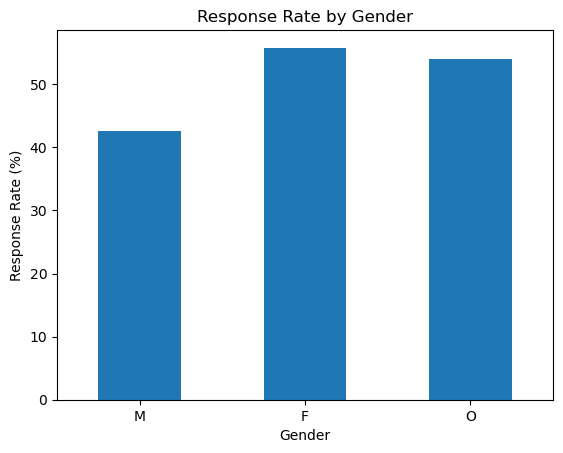

In [47]:
# Calculate the response rate by gender
gender_response_rate = (completed_counts_gender / received_counts_gender) * 100

# Display the results
gender_response_rate.plot(kind='bar')
plt.title('Response Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=0)
plt.show()

##### Interpretation

1. Higher Response Rate Among Women (F):

- The female gender has the highest response rate, close to 55%. This indicates that women who receive offers from Starbucks are more likely to complete the offers compared to other genders. This higher conversion rate may reflect a greater affinity or interest in the promotions offered.

2. High Response Rate for Gender O:

- The category O (other/not specified) also shows a high response rate, similar to that of women. Despite being a relatively small group, individuals in this category seem highly engaged with the offers they receive. This may indicate that, although it is a minority group, it is responsive to Starbucks promotions.

3. Lower Response Rate Among Men (M):

- The lowest response rate is observed in the male gender, at around 45%. Although this is still a relatively high rate, it is noticeably lower than that of the other two groups. This suggests that men are less likely to complete the offers they receive, which may be due to different consumption preferences or less interest in the promotions offered.

##### Considerations

- Targeted Marketing Strategies: Since women and the O group have higher response rates, it may be beneficial to design marketing campaigns and promotions specifically targeting these groups, using approaches and messages that resonate with their interests and behaviors.

- Further Analysis for Men: The lower response rate among men could indicate an opportunity to explore what types of offers or strategies might be more appealing to this group. Understanding the reasons behind this lower conversion rate could help improve engagement with male customers.

In summary, the graph highlights significant differences in response rates to offers among different genders, which can inform and optimize future marketing strategies for Starbucks.

#### Response Rate by Income Group
The chart shows the response rate of offers, broken down by income group. The income groups are divided into four categories: <30K, 30K-60K, 60K-90K, and 90K+. The response rate is expressed as a percentage, indicating the proportion of offers completed relative to the offers received for each income group.

In [48]:
# Calculate the number of offers received and completed by income group
received_counts_income = offers_received['income_group'].value_counts()
completed_counts_income = offers_completed['income_group'].value_counts()

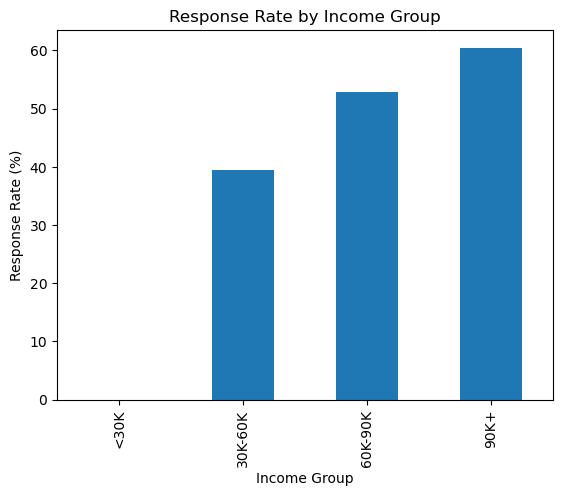

In [49]:
# Calculate the response rate by income group
income_response_rate = (completed_counts_income / received_counts_income) * 100

# Display the results
income_response_rate.plot(kind='bar')
plt.title('Response Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Response Rate (%)')
plt.show()


##### Interpretation

1. Highest Response Rate in the Highest Income Group (90K+):

- The group with incomes above `$90,000` (90K+) has the highest response rate, just over 60%. This indicates that individuals in this income bracket are the most likely to complete the offers they receive, suggesting a higher willingness and ability to take advantage of Starbucks' promotions.

2. Gradual Increase in Response Rate with Higher Income:

- There is a clear trend of increasing response rates as income levels rise. The 60K-90K group also shows a high response rate, close to 55%. This suggests that as users' incomes increase, their likelihood of completing offers also increases, possibly due to greater financial capacity and/or a higher interest in Starbucks' promotions.

3. Moderate Response Rate in the 30K-60K Group:

- The 30K-60K income group has a lower response rate, around 35%. Although still a significant rate, it is notably lower than that of the higher income groups, which may indicate less spending capacity or a lower interest in taking advantage of offers.

4. Insufficient or Missing Data for the <30K Group:

- No response rate is shown for the lowest income group (<30K). This may be due to a low representation of this group in the dataset.

##### Considerations

- Income-Based Marketing Strategies: Starbucks could benefit from tailoring its marketing and promotion strategies to better suit different income groups. Since higher incomes are associated with higher response rates, offering premium products or exclusive experiences might be effective for this group.

- Analysis of Lower Income Groups: Further investigation into the reasons behind the lower response rate in the 30K-60K group would be valuable. This might include market research to better understand the needs and preferences of these segments.

- Accessibility Consideration: If financial accessibility is a barrier for lower income groups, Starbucks might consider introducing more affordable or accessible offers to increase engagement from these segments.

In summary, the graph suggests that individuals with higher incomes are more likely to complete the offers they receive, which could influence how Starbucks designs and targets its marketing campaigns.

#### Response Rate by Age Group
The chart shows the response rate for offers, broken down by age group. The age groups are divided into several categories: 0-29, 30-44, 45-59, 60-74, 75-89, and 90+. The response rate is expressed as a percentage, indicating the proportion of completed offers out of the received offers for each age group.

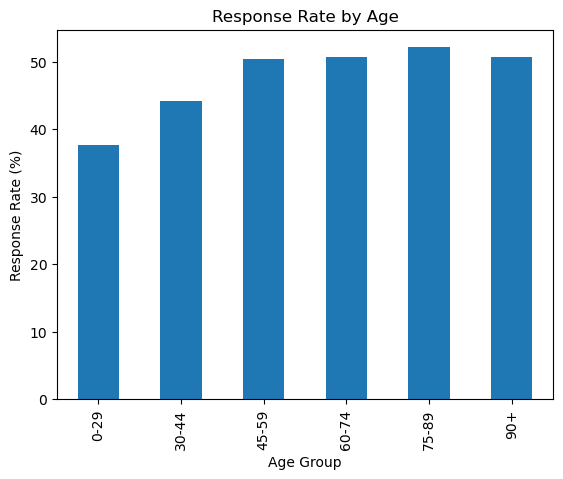

In [50]:
# Calculate the number of offers received and completed by age
received_counts_age = offers_received['age_group'].value_counts()
completed_counts_age = offers_completed['age_group'].value_counts()

# Calculate the response rate by age
age_response_rate = (completed_counts_age / received_counts_age) * 100

# Display the results
age_response_rate.plot(kind='bar')
plt.title('Response Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Response Rate (%)')
plt.show()


##### Interpretation

1. Increasing Response Rate with Age:

- There is a general trend of increasing response rates as age increases. Younger age groups (0-29 and 30-44) have lower response rates compared to older age groups. This might indicate that younger users are less likely to complete offers, possibly due to differences in consumption habits or perceptions of the value of promotions.

2. Higher Response Rates in Older Age Groups:

- The age groups 45-59, 60-74, 75-89, and 90+ have similar response rates, close to or above 50%. In particular, the 75-89 age group shows the highest response rate, slightly above 50%. This suggests that older users are more likely to engage with promotions and complete received offers. This group may have more time or be more motivated to take advantage of offers.

3. Low Response Rate in the 0-29 Age Group:

- The youngest age group (0-29) has the lowest response rate, around 40%. This could be due to less attraction to the offered promotions, or perhaps lower financial capacity to complete offers.

##### Considerations

- Targeted Marketing Strategies: Given that older age groups have higher response rates, it may be useful to design marketing campaigns that cater to the preferences of this segment. Offers that emphasize convenience, quality, and value could resonate well with these groups.

- Attracting Younger Users: The lower response rate in younger age groups might indicate an opportunity to create offers and strategies that are more appealing to this segment. This could include promotions that highlight products popular among younger users or use communication channels preferred by them.

In summary, the graph suggests that older individuals tend to be more responsive to Starbucks' offers and promotions. This information could help guide future marketing campaigns toward more receptive age segments or tailor offers to attract a younger audience.

### 3.5.3. Analysis of the Influence of "Reward" and "Difficulty" on Offer Completion
Given that we have observed differences in response rates based on the type of offer and user demographics, it would be interesting to investigate how the factors of "reward" and "difficulty" influence offer completion.

In [51]:
# Calculation of Completion Rate
# Group by 'offer_id' to count the events
received_counts = offers_received.groupby('offer_id').size().reset_index(name='received')
viewed_counts = offers_viewed.groupby('offer_id').size().reset_index(name='viewed')
completed_counts = offers_completed.groupby('offer_id').size().reset_index(name='completed')

# Join the tables to get a single table with all events
offer_summary = received_counts.merge(viewed_counts, on='offer_id', how='left').merge(completed_counts, on='offer_id', how='left')

# Remove rows with NaN, as they refer to informational offers that have no completion
offer_summary = offer_summary.dropna()

# Calculate the completion rate
offer_summary['completion_rate'] = (offer_summary['completed'] / offer_summary['received'])*100

# Join with 'reward' and 'difficulty' data from 'portfolio_df'
offer_summary = offer_summary.merge(portfolio_df[['id', 'reward', 'difficulty']], left_on='offer_id', right_on='id')

offer_summary.head(10)

,offer_id,received,viewed,completed,completion_rate,id,reward,difficulty
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,6726,2215,3306.0,49.152542,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,20
1,2298d6c36e964ae4a3e7e9706d1fb8c2,6655,6379,4847.0,72.832457,2298d6c36e964ae4a3e7e9706d1fb8c2,3,7
2,2906b810c7d4411798c6938adc9daaa5,6631,3460,3860.0,58.211431,2906b810c7d4411798c6938adc9daaa5,2,10
3,4d5c57ea9a6940dd891ad53e9dbe8da0,6593,6329,3281.0,49.764902,4d5c57ea9a6940dd891ad53e9dbe8da0,10,10
4,9b98b8c7a33c4b65b9aebfe6a799e6d9,6685,3499,4141.0,61.944652,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5
5,ae264e3637204a6fb9bb56bc8210ddfd,6683,5901,3604.0,53.927877,ae264e3637204a6fb9bb56bc8210ddfd,10,10
6,f19421c1d4aa40978ebb69ca19b0e20d,6576,6310,4074.0,61.952555,f19421c1d4aa40978ebb69ca19b0e20d,5,5
7,fafdcd668e3743c1bb461111dcafc2a4,6652,6407,4957.0,74.518942,fafdcd668e3743c1bb461111dcafc2a4,2,10


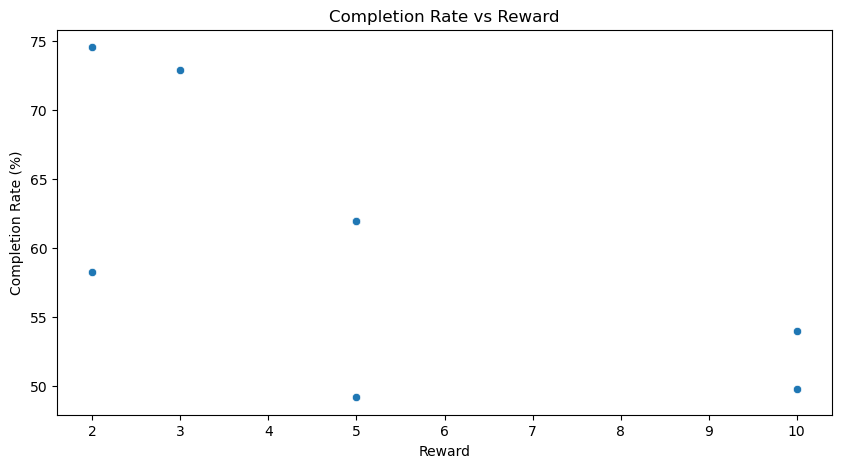

Correlation coefficient for Reward: -0.6797689660926673


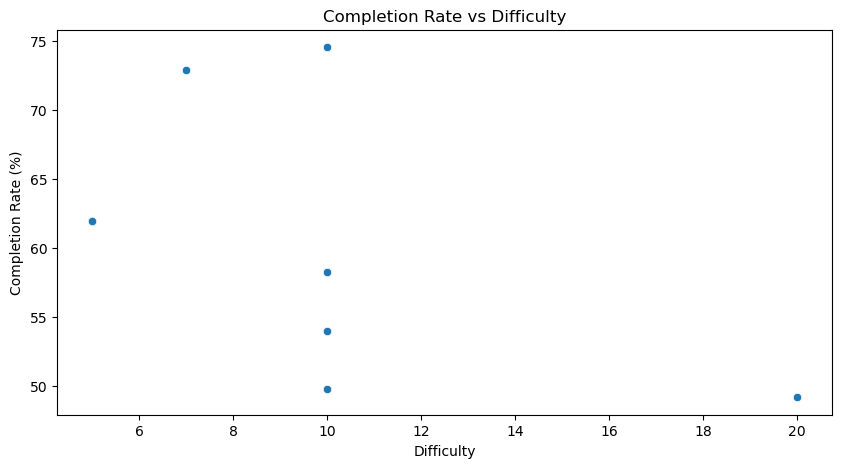

Correlation coefficient for Difficulty: -0.518969467962264
Regression coefficients: [-1.95036846 -0.96550109]
Intercept: 79.82055216183433


In [52]:
# Analysis of Reward
plt.figure(figsize=(10, 5))
sns.scatterplot(x='reward', y='completion_rate', data=offer_summary)
plt.title('Completion Rate vs Reward')
plt.xlabel('Reward')
plt.ylabel('Completion Rate (%)')
plt.show()

# Correlation Analysis for Reward
correlation_reward = offer_summary['reward'].corr(offer_summary['completion_rate'])
print(f"Correlation coefficient for Reward: {correlation_reward}")

# Analysis of Difficulty
plt.figure(figsize=(10, 5))
sns.scatterplot(x='difficulty', y='completion_rate', data=offer_summary)
plt.title('Completion Rate vs Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Completion Rate (%)')
plt.show()

# Correlation Analysis for Difficulty
correlation_difficulty = offer_summary['difficulty'].corr(offer_summary['completion_rate'])
print(f"Correlation coefficient for Difficulty: {correlation_difficulty}")

# Multiple Linear Regression Analysis
X = offer_summary[['reward', 'difficulty']]
y = offer_summary['completion_rate']
model = LinearRegression()
model.fit(X, y)
print(f"Regression coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

#### Interpretation

1. Completion Rate vs Reward

- Scatter Plot: The plot shows a negative relationship between reward and completion rate. As the reward increases, the completion rate tends to decrease.

- Correlation Coefficient: The correlation coefficient for reward is -0.6797, indicating a moderate to strong negative correlation. This result is unexpected, as higher rewards would generally be anticipated to motivate a higher completion rate. One possible interpretation is that offers with higher rewards may have more difficult requirements, which reduces the completion rate.

2. Completion Rate vs Difficulty

- Scatter Plot: The plot shows a negative relationship between difficulty and completion rate. As difficulty increases, the completion rate decreases.

- Correlation Coefficient: The correlation coefficient for difficulty is -0.5189, indicating a moderate negative correlation. This suggests that offers requiring higher expenditure (greater difficulty) are less likely to be completed, which aligns with the intuition that more demanding offers are harder to fulfill.

3. Multiple Linear Regression

- Regression Coefficients:
    - Reward: -1.9503
    - Difficulty: -0.9655

- Interpretation of Coefficients:
    - Reward: Each unit increase in reward is associated with approximately a 1.95% decrease in the completion rate, holding difficulty constant.
    - Difficulty: Each unit increase in difficulty is associated with approximately a 0.97% decrease in the completion rate, holding reward constant.

- Intercept: 79.82, suggesting that, without considering reward and difficulty, the baseline completion rate is 79.82%.

#### Conclusions

- Inverse Relationship with Reward: The unexpected negative correlation between reward and completion rate may indicate that higher reward offers also come with higher entry barriers (such as increased difficulty), which deters users from completing them. This suggests that simply increasing the reward does not always guarantee a higher completion rate.

- Impact of Difficulty: The negative relationship with difficulty is consistent with the idea that users are less likely to complete more challenging offers. This highlights the importance of balancing difficulty and accessibility to maximize participation.

- Strategies for Offers: These results suggest that Starbucks should carefully consider how to structure offers. Rewards should be attractive but also attainable. Offers that are too difficult or perceived as unreachable may deter users, even if the reward is high.

In summary, to maximize the effectiveness of offers, it is crucial to find a balance between reward and difficulty that is appealing and achievable for users.

# Section 4: Predictive Modeling
<a id="Section4_PredictiveModeling"></a>

## 4.1. Objective
<a id="Objective"></a>
The main objective is to develop a predictive model that can forecast whether a customer will complete a specific offer based on demographic characteristics and the type of offer.

## 4.2. Data Preparation
<a id="Data_Preparation"></a>

### Create an Explicit Copy of the DataFrame
We ensure to work with a copy of the original data to avoid accidental modifications to the original dataset.

In [53]:
# Create an Explicit Copy of the DataFrame
offers_received_completed = offers_received.copy()
offers_received_completed = offers_received_completed[offers_received_completed['offer_type'] != 'informational']


### Initialize the 'completed' Column with 0
Initialize with 0 for all rows, initially assuming that no offers have been completed.

In [54]:
offers_received_completed['completed'] = 0  # Initialize the 'completed' column with 0

### Mark Offers as Completed
Identify the offers that were actually completed by users.

In [55]:
# Identify offers as completed by checking for matches between person and offer_id in offers_completed
for idx, row in offers_completed.iterrows():
    person = row['person']
    offer_id = row['offer_id']
    # Search for matches of person and offer_id in offers_received_completed
    mask = (offers_received_completed['person'] == person) & (offers_received_completed['offer_id'] == offer_id)
    offers_received_completed.loc[mask, 'completed'] = 1


### Feature Selection and Target Variable
Determine the predictor variables (features) and the target variable for the predictive model.

In [56]:
# Feature Selection and Target Variable
features = offers_received_completed[['age', 'income', 'gender', 'offer_type', 'difficulty', 'reward_portfolio']]
target = offers_received_completed['completed']


### Encoding Categorical Variables
Convert categorical variables into dummy variables for use in predictive models.

In [57]:
# Encoding Categorical Variables
features = pd.get_dummies(features, columns=['gender', 'offer_type'])


### Splitting the Dataset into Training and Testing Sets
We divide the dataset into two parts: one for training the model and the other for evaluating it.

In [58]:
# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## 4.3. Training Models
<a id="Training_Models"></a>

We will test various models to predict whether a customer will complete an offer and determine which one best fits our needs.

### 4.3.1. Logistic Regression

In [59]:
# Initialization and Training of the Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy (Regresión Logística):", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy (Regresión Logística): 0.6478714406540739
Confusion Matrix:
 [[   0 3747]
 [   0 6894]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3747
           1       0.65      1.00      0.79      6894

    accuracy                           0.65     10641
   macro avg       0.32      0.50      0.39     10641
weighted avg       0.42      0.65      0.51     10641



/Users/eider.garcia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eider.garcia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eider.garcia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Results

- Accuracy: 0.65

- Confusion Matrix:
    - Class 0 (Not Completed): All examples were classified as not completed, suggesting the model is not correctly predicting class 0.
    - Class 1 (Completed): All examples were correctly classified as completed.

- Classification Report:
    - Class 0 (Not Completed):
        - Precision: 0.00 (The model does not predict this class)
        - Recall: 0.00 (The model does not correctly identify this class)
        - F1-Score: 0.00
    - Class 1 (Completed):
        - Precision: 0.65
        - Recall: 1.00
        - F1-Score: 0.79

#### Interpretation

The Logistic Regression model appears to be biased towards the "Completed" class, predicting all instances as "Completed." This suggests a problem with data imbalance or that the model is not capturing the features that differentiate the two classes.

### 4.3.2. Decision Tree

In [60]:
# Initializing and Training the Model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_clf.predict(X_test)

# Evaluation
print("Accuracy (Árbol de Decisión):", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Accuracy (Árbol de Decisión): 0.6765341603232778
Confusion Matrix:
 [[2238 1509]
 [1933 4961]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.60      0.57      3747
           1       0.77      0.72      0.74      6894

    accuracy                           0.68     10641
   macro avg       0.65      0.66      0.65     10641
weighted avg       0.69      0.68      0.68     10641



#### Results

- Accuracy: 0.68

- Confusion Matrix:
    - Class 0 (Not Completed): 2238 correctly classified, 1509 incorrectly classified.
    - Class 1 (Completed): 1933 incorrectly classified, 4961 correctly classified.

- Classification Report:
    - Class 0 (Not Completed):
        - Precision: 0.54
        - Recall: 0.60
        - F1-Score: 0.57
    - Class 1 (Completed):
        - Precision: 0.77
        - Recall: 0.72
        - F1-Score: 0.74
        
#### Interpretation

The Decision Tree model shows an overall accuracy of approximately 68%. For the "Not Completed" (0) class, it has a precision of 0.54 and a recall of 0.60, indicating that the model is reasonably good at identifying negative cases, though it struggles with some inaccuracies. For the "Completed" (1) class, the model demonstrates better precision (0.77) and recall (0.72), suggesting it is more effective at predicting positive cases, though there is still room for improvement.

This analysis suggests that while the Decision Tree model is more effective than the Logistic Regression model in distinguishing between classes, there is still an imbalance in performance, with better capability in predicting completed offers compared to not completed offers.

#### Next Steps

- Hyperparameter Tuning for the Decision Tree: Adjusting the hyperparameters of the model may improve its performance. Techniques such as Grid Search or Random Search can be used to find the best parameters.

- Ensemble Models Testing: Using ensemble methods like Random Forest or Gradient Boosting may enhance accuracy by combining multiple decision trees. These models are known for handling class imbalances and improving generalization.

- Handling Imbalanced Classes: Adjust class weights or use oversampling techniques (such as SMOTE) or undersampling to balance the amount of data in each class.

- Feature Evaluation: Conduct a more detailed evaluation of features to identify and remove redundant or non-informative features.

### 4.3.3. Hyperparameter Tuning
We will start with hyperparameter tuning for the Decision Tree using Grid Search:

In [61]:
# Define the parameters to search in the grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Print the best parameters and results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best validation score: {grid_search.best_score_}")


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best validation score: 0.6929041353383459


#### Results

- Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

    - criterion: 'gini'. This criterion is used to measure the quality of a split. In this case, the Gini index is selected, meaning the Decision Tree is built to maximize branch purity using this measure.

    - max_depth: 10. The maximum depth of the tree is limited to 10. This helps control overfitting by limiting the complexity of the tree. A deeper tree can capture more details from the training data but may also overfit.

    - min_samples_leaf: 1. This parameter indicates the minimum number of samples a leaf must have. With a value of 1, the model can create leaves with a single sample. This setting can allow the model to capture fine details but may also lead to overfitting if not managed properly.

    - min_samples_split: 2. The minimum number of samples required to split an internal node. A value of 2 is the lowest possible, allowing the model to split nodes as long as there are at least 2 samples. This can also help the model learn finer details.

- Best Validation Score: 0.6929.

    - This value represents the average accuracy obtained through cross-validation with the best-found parameters. In other words, the model with these hyperparameters achieved an average accuracy of 69.29% during cross-validation.

#### Interpretation

- Parameter Choice: The choice of parameters like max_depth of 10 and min_samples_leaf of 1 suggests that the model needs some depth and capacity to capture details in the data but does not need to go too deep, which could avoid overfitting.

- Moderate Accuracy: With an average accuracy of 69.29%, the model shows moderate performance. This indicates that while the model is capturing patterns in the data, there is still room for improvement. Accuracy might increase with further adjustments to hyperparameters, additional features, or even more complex models.

### 4.3.4. Decision Tree with Hyperparameter Tuning

In [62]:
final_tree_clf = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
final_tree_clf.fit(X_train, y_train)
final_pred = final_tree_clf.predict(X_test)
print("Accuracy (Decision Tree with Hyperparameter Tuning):", accuracy_score(y_test, final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred))
print("Classification Report:\n", classification_report(y_test, final_pred))

Accuracy (Decision Tree with Hyperparameter Tuning): 0.6902546753124706
Confusion Matrix:
 [[1443 2304]
 [ 992 5902]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.39      0.47      3747
           1       0.72      0.86      0.78      6894

    accuracy                           0.69     10641
   macro avg       0.66      0.62      0.62     10641
weighted avg       0.67      0.69      0.67     10641



### 4.3.5. Decision Tree with Balanced Classes

In [63]:
tree_clf_balanced = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree_clf_balanced.fit(X_train, y_train)
balanced_pred = tree_clf_balanced.predict(X_test)
print("Accuracy (Decision Tree with Balanced Classes):", accuracy_score(y_test, balanced_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, balanced_pred))
print("Classification Report:\n", classification_report(y_test, balanced_pred))

Accuracy (Decision Tree with Balanced Classes): 0.6717413776900667
Confusion Matrix:
 [[2259 1488]
 [2005 4889]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.60      0.56      3747
           1       0.77      0.71      0.74      6894

    accuracy                           0.67     10641
   macro avg       0.65      0.66      0.65     10641
weighted avg       0.68      0.67      0.68     10641



### 4.3.6. Decision Tree with Balanced Classes and Hyperparameter Tuning

In [64]:
final_tree_clf = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42,
    class_weight='balanced'
)
final_tree_clf.fit(X_train, y_train)
final_pred = final_tree_clf.predict(X_test)
print("Accuracy (Decision Tree with Balanced Classes and Hyperparameter Tuning):", accuracy_score(y_test, final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred))
print("Classification Report:\n", classification_report(y_test, final_pred))

Accuracy (Decision Tree with Balanced Classes and Hyperparameter Tuning): 0.6365943050465181
Confusion Matrix:
 [[2343 1404]
 [2463 4431]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.63      0.55      3747
           1       0.76      0.64      0.70      6894

    accuracy                           0.64     10641
   macro avg       0.62      0.63      0.62     10641
weighted avg       0.66      0.64      0.64     10641



### 4.3.7. Random Forest

In [65]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Accuracy (Random Forest):", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Accuracy (Random Forest): 0.6895028662719669
Confusion Matrix:
 [[2135 1612]
 [1692 5202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.56      3747
           1       0.76      0.75      0.76      6894

    accuracy                           0.69     10641
   macro avg       0.66      0.66      0.66     10641
weighted avg       0.69      0.69      0.69     10641



#### Results

- Accuracy: 0.6895

- Confusion Matrix:
    - Class 0 (Not Completed): 2135 correctly classified, 1612 incorrectly classified.
    - Class 1 (Completed): 1692 incorrectly classified, 5202 correctly classified.

- Classification Report:
    - Class 0 (Not Completed):
        - Precision: 0.56
        - Recall: 0.57
        - F1-Score: 0.56
    - Class 1 (Completed):
        - Precision: 0.76
        - Recall: 0.75
        - F1-Score: 0.76

#### Interpretation

The Random Forest model has an overall accuracy of approximately 68.95%. For Class 0 (Not Completed), the precision and recall are moderate, indicating that the model struggles to correctly identify negative cases. For Class 1 (Completed), the model shows higher precision and recall, demonstrating better performance in accurately identifying positive cases. However, the model still has a considerable number of false negatives (completed offers not identified).

### 4.3.8. Gradient Boosting

In [66]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print("Accuracy (Gradient Boosting):", accuracy_score(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))

Accuracy (Gradient Boosting): 0.7012498825298374
Confusion Matrix:
 [[1402 2345]
 [ 834 6060]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.37      0.47      3747
           1       0.72      0.88      0.79      6894

    accuracy                           0.70     10641
   macro avg       0.67      0.63      0.63     10641
weighted avg       0.69      0.70      0.68     10641



#### Results
- Accuracy: 0.7012

- Confusion Matrix:

    - Class 0 (Not Completed): 1402 correctly classified, 2345 incorrectly classified.
    - Class 1 (Completed): 834 incorrectly classified, 6060 correctly classified.

- Classification Report:

    - Class 0 (Not Completed):
        - Precision: 0.63
        - Recall: 0.37
        - F1-Score: 0.47
    - Class 1 (Completed):
        - Precision: 0.72
        - Recall: 0.88
        - F1-Score: 0.79

#### Interpretation

The Gradient Boosting model shows an improved overall accuracy of 70.12%, slightly higher than Random Forest. For Class 0 (Not Completed), precision is higher (0.63), but recall is significantly lower (0.37), suggesting that the model struggles to correctly identify many negative cases, leading to a considerable number of false positives. On the other hand, for Class 1 (Completed), the model performs well with a recall of 0.88 and an F1-score of 0.79, demonstrating better ability to identify positive cases.


### 4.3.9. Random Forest for Feature Selection

This is a feature selection technique based on feature importance. In this case, the Random Forest model is used to determine which features are most relevant for predicting whether a customer will complete an offer. A threshold of 0.1 is used to select features that have a relative importance above this value.

In [67]:
# Use Random Forest for Feature Selection
sfm = SelectFromModel(rf_clf, threshold=0.1)
sfm.fit(X_train, y_train)

# Transform the dataset
X_train_transformed = sfm.transform(X_train)
X_test_transformed = sfm.transform(X_test)

# View the selected features
selected_features = features.columns[sfm.get_support()]
print(f"Selected features: {selected_features}")

Selected features: Index(['age', 'income'], dtype='object')


#### Interpretation

- Feature Selection: The process has identified 'age' and 'income' as the most relevant features for prediction according to the Random Forest model. This means that these two features have the greatest impact on the decision to complete an offer, according to this model.

- Application in the Gradient Boosting Model: Feature selection can be used to simplify the final model and improve its interpretability. Although the Gradient Boosting model has been identified as the best model in terms of accuracy and recall, feature selection helps reduce the dimensionality of the dataset, which can improve the model's performance and reduce the risk of overfitting.

- Implementation: For the final implementation, considering only the selected features ('age' and 'income') to train the Gradient Boosting model can be beneficial. This not only simplifies the model but also facilitates its deployment in production systems where data collection might be limited.

### 4.3.10. Gradient Boosting Using Only Selected Features

In [68]:
# Define the Gradient Boosting model
gb_clf_selected = GradientBoostingClassifier(random_state=42)

# Train the model with the selected features
gb_clf_selected.fit(X_train_transformed, y_train)

# Make predictions
gb_pred_selected = gb_clf_selected.predict(X_test_transformed)

# Evaluate the model
accuracy_selected = accuracy_score(y_test, gb_pred_selected)
confusion_selected = confusion_matrix(y_test, gb_pred_selected)
classification_report_selected = classification_report(y_test, gb_pred_selected)

# Print results
print(f"Accuracy (Gradient Boosting with selected features): {accuracy_selected}")
print("Confusion Matrix:\n", confusion_selected)
print("Classification Report:\n", classification_report_selected)

Accuracy (Gradient Boosting with selected features): 0.6589606240015036
Confusion Matrix:
 [[1066 2681]
 [ 948 5946]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.28      0.37      3747
           1       0.69      0.86      0.77      6894

    accuracy                           0.66     10641
   macro avg       0.61      0.57      0.57     10641
weighted avg       0.63      0.66      0.63     10641



## 4.4. Model Evaluation
<a id="Model_Evaluation"></a>

### Model Results

Among the models presented, the Gradient Boosting model appears to be the most suitable for predicting whether a customer will complete an offer based on demographic characteristics and the type of offer. Here are the reasons:

- Best Overall Accuracy: The Gradient Boosting model has an overall accuracy of 0.70, which is the highest among the evaluated models.

- Better Balance Between Classes: Although all models show certain imbalances, Gradient Boosting provides a better balance in the F1-score for both classes. Specifically, it has an F1-score of 0.47 for class 0 and 0.79 for class 1, indicating a higher ability to correctly predict both completed and not completed offers.

- Higher Recall for Class 1: Gradient Boosting has a recall of 0.88 for class 1, meaning the model has a high rate of identifying offers that will be completed.

- Fewer False Positives: While the model has a moderate F1-score for class 0, its precision in identifying class 1 (completed offers) is crucial for business decisions, such as personalizing offers and marketing campaigns.

### Conclusion

Although no model is perfect, Gradient Boosting offers a good balance between precision and recall for both classes, making it the most suitable model for this task. This model can be implemented to predict the likelihood that a customer will complete an offer, and this information can be used to tailor marketing campaigns and improve the effectiveness of offers.

## 4.5. Example of Model Application in Production
<a id="ExampleOfModelApplicationInProduction"></a>

Let's assume we have a new customer with the following characteristics:

- Age: 35
- Income: 60,000
- Gender: M
- Offer Type: 'bogo'
- Difficulty: 5
- Reward: 10

In [69]:
# Convert categorical features to dummy variables
nuevo_cliente = pd.DataFrame({
    'age': [35],
    'income': [60000],
    'difficulty': [5],
    'reward_portfolio': [10],
    'gender_F': [0],
    'gender_M': [1],
    'gender_O': [0],
    'offer_type_bogo': [1],
    'offer_type_discount': [0]
})

# Make prediction for the new customer
prediccion = gb_clf.predict(nuevo_cliente)
print(f"Prediction for the new customer: {prediccion[0]}")  # 0 for will not complete, 1 for will complete

Prediction for the new customer: 1


## 4.6. Final Conclusions
<a id="Final_Conclusions"></a>

The conclusions we can draw from the results obtained using the Gradient Boosting model with all features versus using only the selected features (age and income) are as follows:

1. Impact of Feature Selection:

    - The model with all features (Gradient Boosting) has an accuracy of 0.70, while the model with only the selected features (Gradient Boosting with selected features) has an accuracy of 0.659.
    - The F1-Score for the positive class (will complete the offer) is also higher in the model with all features (0.79 compared to 0.77). This indicates that while the simplified model performs reasonably well, some precision and predictive capability are lost by removing certain features.

2. Performance on Classes:

    - The precision and F1-Score for the "will not complete the offer" (0) class decrease significantly in the simplified model. This suggests that other unselected features may play an important role in the correct prediction of this class.

3. Feature Importance:

    - Including additional features seems to improve the model's ability to distinguish between users who will complete and those who will not complete an offer. However, using only age and income still provides a reasonable model, indicating that these features are quite informative on their own.

4. Balance between Simplicity and Performance:

    - Although the model with all features performs better, the simplified model is more interpretable and easier to implement. Depending on the application, it might be worth sacrificing some accuracy for greater simplicity.

In summary, while the model with all features has better performance, the use of a simplified model with just age and income still offers reasonable predictions. The choice of model will depend on the balance between the need for accuracy and implementation simplicity. However, it is recommended to consider all available features to maximize the accuracy and predictive value of the model.

## 4.7. Business Benefits of the Model
<a id="Business_BenefitsOfTheModel"></a>

### Offer Personalization:

The model enables personalized offers based on the probability of a customer completing them, thereby optimizing the resources invested in marketing campaigns. Offers can be tailored according to the customer’s demographic characteristics, maximizing the likelihood of success.

### Resource Optimization:

By identifying customers who are more likely to complete an offer, the business can focus its efforts on this segment, increasing marketing efficiency and improving return on investment.

### Improved Customer Experience:

Providing more relevant offers makes customers feel more valued and understood, which can enhance customer loyalty and satisfaction.

### Predictive Analysis:

The model can be used to analyze trends and patterns in customer responses, allowing the business to anticipate future behaviors and adjust accordingly.

### Revenue Increase:

Greater accuracy in predicting customer responses can lead to a higher conversion rate of offers and, ultimately, an increase in revenue.

### Customer Segmentation:

The ability to segment customers based on their likelihood of responding to offers allows the business to create more specific and effective marketing segments.

Implementing a well-trained and fine-tuned Gradient Boosting model can provide a significant competitive advantage, helping the business improve its marketing strategies, increase customer retention, and maximize revenue.

## 4.8. Future Steps
<a id="Future_Steps"></a>

With predictive modeling underway, here are some future steps to consider:

1. Continuous Model Optimization:

    - Hyperparameter Tuning: Conduct further hyperparameter searches, possibly using techniques such as Random Search or even Bayesian methods to further optimize the model.
    - Feature Selection Improvement: Experiment with new features or transformations, such as interactions between features or principal components.

2. Exploration of Advanced Models:

    - Advanced Models: Test more complex models such as Neural Networks, SVMs, or more sophisticated Ensembles like Stacking.
    - Interpretable Models: Consider interpretable models like Decision Rules or explanations for complex models using methods like LIME or SHAP.

3. Data Expansion:

    - Incorporate New Data Sources: Integrate external or additional data that might provide further insights into users and their behaviors.
    - Increase Data Volume: If possible, collect more data to train the model and improve its performance.

4. Model Validation and Monitoring:

    - Continuous Validation: Conduct periodic validations of the model with new data to ensure its relevance and accuracy.
    - Production Monitoring: Implement mechanisms to monitor the model's performance in a production environment, ensuring it remains effective.

5. Deployment and Scalability:

    - Deployment: Implement the model in a production environment, ensuring it is optimized for response time and efficiency.
    - Scalability: Prepare the system to handle a growing volume of users and requests.

6. User Experience Analysis and Improvement:

    - User Segmentation: Use the model to segment users into more specific groups and tailor offers based on these segments.
    - A/B Testing: Conduct A/B testing to evaluate the effectiveness of different types of offers or marketing strategies based on the model’s predictions.

7. Documentation and Reporting:

    - Documentation: Maintain detailed documentation of the model, experiments conducted, and results obtained.
    - Reports and Presentations: Create reports and presentations to communicate findings and recommendations to stakeholders.

8. Research and Development:

    - Research New Techniques: Stay updated with the latest research in the field of machine learning and consider its application.
    - Product Innovation: Use predictive analysis to innovate and develop new products or services based on user needs and preferences.
    
These steps will help keep the model up-to-date and effective, ensuring it aligns with business goals and customer needs.

# 5. Building a Recommendation System for Starbucks Offers
<a id="Building_Recommendation_System_Starbucks_Offers"></a>

Developing a recommendation system to suggest the most appropriate offers to each user can significantly enhance marketing strategies. The existing data provides information about customer demographics, behavior, and responses to different types of offers. Leveraging this information can help personalize offers for each user, potentially increasing engagement and conversion rates.

## 5.1. Benefits of a Recommendation System
<a id="BenefitsRecommendationSystem"></a>

1. Personalization: By analyzing user demographics and past behavior, the system can suggest offers that are likely to be of interest to each user, increasing the probability of acceptance and completion of the offer.

2. Increased Engagement: Personalized offers can make users feel valued and understood, fostering a stronger connection with the brand.

3. Optimization of Marketing Spend: Targeting the right offers to the right users can reduce wasted marketing efforts, ensuring that resources are focused on campaigns with the highest potential return.

4. Data-Driven Insights: The system can continuously learn from new data, improving its recommendations over time and providing valuable insights into user preferences and trends.

## 5.2. Recommender Based on a User-Offer Matrix
<a id="RecommenderBasedOnUserOfferMatrix"></a>

We will create a recommender based on a user-offer matrix, where the values indicate whether an offer was completed (1) or not (0).

### Creation of the Completeness Matrix

In [70]:
offers_received_completed_recom = offers_received_completed.copy()
duplicados =  offers_received_completed_recom.duplicated(subset=['person', 'offer_id'], keep=False)
print(f"Number of Duplicates: {duplicados.sum()}")

Number of Duplicates: 17156


In [71]:
# Remove Exact Duplicates
offers_received_completed_recom = offers_received_completed_recom.drop_duplicates(subset=['person', 'offer_id'], keep='first')

In [72]:
# Create a Pivot Table to Construct the Completeness Matrix
completitud_matrix = offers_received_completed_recom.pivot(index='person', columns='offer_id', values='completed')

# Fill NaN with 0, since NaN indicates that the offer was not received and therefore was not completed
completitud_matrix = completitud_matrix.fillna(0)

# Ensure the values are integers (0 or 1)
completitud_matrix = completitud_matrix.astype(int)

# Display the Completeness Matrix
completitud_matrix.head()

offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,2906b810c7d4411798c6938adc9daaa5,4d5c57ea9a6940dd891ad53e9dbe8da0,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4
person,,,,,,,,
0009655768c64bdeb2e877511632db8f,0,0,1,0,0,0,1,1
0011e0d4e6b944f998e987f904e8c1e5,1,1,0,0,1,0,0,0
0020c2b971eb4e9188eac86d93036a77,0,0,0,1,0,0,0,1
0020ccbbb6d84e358d3414a3ff76cffd,0,1,0,0,1,0,1,0
003d66b6608740288d6cc97a6903f4f0,1,0,0,0,0,0,0,1


### Recommendation Based on the Completeness Matrix

To recommend offers, we could use two main approaches:

- User-Based or Item-Based Collaborative Filtering: Recommend offers that similar users have completed.
- Predictive Model: Train a model to predict the likelihood that a user will complete an unseen offer.

In [73]:
# Calculate cosine similarity between users
user_similarity = cosine_similarity(completitud_matrix)

# Convert the similarity matrix to a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=completitud_matrix.index, columns=completitud_matrix.index)

def recomendar_ofertas(user_id, user_similarity_df, completitud_matrix):
    """
    Recommends offers to a user based on those completed by similar users.

    Args:
    - user_id (str): ID of the user for whom recommendations are made.
    - user_similarity_df (DataFrame): User similarity matrix.
    - completitud_matrix (DataFrame): Completeness matrix of offers by users.

    Returns:
    - list: List of recommended offer IDs.
    """
    # Get the most similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]

    # Recommendation based on similar users
    # Take offers completed by similar users that the current user has not completed
    offers_to_recommend = []
    for similar_user in similar_users:
        user_offers = completitud_matrix.loc[similar_user]
        offers_not_completed = user_offers[(user_offers == 1) & (completitud_matrix.loc[user_id] == 0)].index.tolist()
        offers_to_recommend.extend(offers_not_completed)

    # Remove duplicates and recommend the best options
    offers_to_recommend = list(set(offers_to_recommend))
    return offers_to_recommend



#### Example of Use

In [74]:
# Example of Using the Function
user_id = '0020ccbbb6d84e358d3414a3ff76cffd'
offers_to_recommend = recomendar_ofertas(user_id, user_similarity_df, completitud_matrix)

# Display Results
print(f"Recommended offers for the user {user_id}: {offers_to_recommend}")

Recommended offers for the user 0020ccbbb6d84e358d3414a3ff76cffd: ['2906b810c7d4411798c6938adc9daaa5', 'fafdcd668e3743c1bb461111dcafc2a4', 'ae264e3637204a6fb9bb56bc8210ddfd', '0b1e1539f2cc45b7b9fa7c272da2e1d7', '4d5c57ea9a6940dd891ad53e9dbe8da0']


### Recommendation Based on the Previously Built Predictive Model

In [75]:
def predecir_completitud_ofertas(user_id, offers_received_completed_recom, portfolio_df, model):
    """
    Predicts the completion probability of offers for a given user.

    Args:
    - user_id (str): ID of the user for whom recommendations are made.
    - offers_received_completed_recom (DataFrame): DataFrame with user data and their interactions with offers.
    - portfolio_df (DataFrame): DataFrame with data on available offers.
    - model (sklearn model): Trained predictive model.

    Returns:
    - DataFrame: DataFrame with offers and their completion probabilities.
    """
    # Get the user's data
    user_data = offers_received_completed_recom[offers_received_completed_recom['person'] == user_id].iloc[0]

    # Extract relevant user data
    user_info = {
        'age': user_data['age'],
        'income': user_data['income'],
        'gender_F': 0,
        'gender_M': 0,
        'gender_O': 0
    }
    # Assign the corresponding value based on gender
    user_info[f"gender_{user_data['gender']}"] = 1

    # Get IDs of the offers already completed by the user
    completed_offers = offers_received_completed_recom[
        (offers_received_completed_recom['person'] == user_id) & 
        (offers_received_completed_recom['completed'] == 1)
    ]['offer_id'].tolist()

    # Prepare the offer data
    portfolio_dummy = pd.get_dummies(portfolio_df, columns=['offer_type'])

    # Rename the 'reward' column to 'reward_portfolio' to match the training data
    portfolio_dummy = portfolio_dummy.rename(columns={'reward': 'reward_portfolio'})

    # Filter out offers that the user has already completed
    portfolio_dummy = portfolio_dummy[~portfolio_dummy['id'].isin(completed_offers)]

    # Select the columns used in model training
    features_columns = ['age', 'income', 'difficulty', 'reward_portfolio', 
                        'gender_F', 'gender_M', 'gender_O', 
                        'offer_type_bogo', 'offer_type_discount']

    # Create a DataFrame with user data replicated for each offer
    user_df = pd.DataFrame([user_info] * len(portfolio_dummy))

    # Merge user data with offer data
    pred_data = pd.concat([user_df.reset_index(drop=True), portfolio_dummy.reset_index(drop=True)], axis=1)

    # Select only the necessary columns
    pred_data = pred_data[features_columns]

    # Generate completion predictions
    completitud_prob = model.predict_proba(pred_data)[:, 1]  # Probability of class 1 (completeness)

    # Add probabilities to the offers DataFrame
    portfolio_dummy['completion_probability'] = completitud_prob

    # Sort by completion probability
    portfolio_dummy = portfolio_dummy.sort_values(by='completion_probability', ascending=False)

    return portfolio_dummy


#### Example of usage

In [76]:
# Example usage
# Assume user_id is the ID of the user for whom recommendations are made
user_id = '0009655768c64bdeb2e877511632db8f'

# Call the function with the relevant data
recomendaciones = predecir_completitud_ofertas(user_id, offers_received_completed_recom, portfolio_df, gb_clf)

# Display the recommendations
print(recomendaciones[['id', 'completion_probability']])

                                 id  completion_probability
5  2298d6c36e964ae4a3e7e9706d1fb8c2                0.680393
2  3f207df678b143eea3cee63160fa8bed                0.675599
7  5a8bc65990b245e5a138643cd4eb9837                0.675599
3  9b98b8c7a33c4b65b9aebfe6a799e6d9                0.569530
4  0b1e1539f2cc45b7b9fa7c272da2e1d7                0.378337
0  ae264e3637204a6fb9bb56bc8210ddfd                0.373141
1  4d5c57ea9a6940dd891ad53e9dbe8da0                0.373141


### Final Recommender

To combine both recommendations (based on the completeness matrix and the predictive model), follow these steps:

1. Obtain Recommendations from the Completeness Matrix: Extract recommended offers based on similarity with other users.

2. Obtain Recommendations from the Predictive Model: Use the predictive model to calculate the probability of completion for offers for a specific customer.

3. Combine and Rank Recommendations: Merge both recommendation lists and rank them based on a combined metric that considers both the popularity of the offer (completeness matrix) and the probability of completion (predictive model).

In [77]:
def recomendador_final(user_id, user_similarity_df, completitud_matrix, offers_received_completed_recom, portfolio_df, model, alpha=0.5):
    """
    Recommends offers to a user by combining user similarity-based recommendations and predictive model recommendations.

    Args:
    - user_id (str): ID of the user for whom recommendations are made.
    - user_similarity_df (DataFrame): User similarity matrix.
    - completitud_matrix (DataFrame): Completeness matrix of offers by users.
    - offers_received_completed_recom (DataFrame): DataFrame with user data and their interactions with offers.
    - portfolio_df (DataFrame): DataFrame with available offer data.
    - model (sklearn model): Trained predictive model.
    - alpha (float): Weighting factor for combining recommendations (0 <= alpha <= 1). It is used to weigh the importance of each type of recommendation. For example, if alpha = 0.5, both recommendations are weighted equally. You can adjust alpha to give more weight to one of the methods.

    Returns:
    - DataFrame: DataFrame with offers and their combined scores.
    """
    # User similarity-based recommendations
    user_based_recommendations = recomendar_ofertas(user_id, user_similarity_df, completitud_matrix)

    # Predictive model-based recommendations
    model_based_recommendations = predecir_completitud_ofertas(user_id, offers_received_completed_recom, portfolio_df, model)

    # Normalize the probabilities from the predictive model
    max_prob = model_based_recommendations['completion_probability'].max()
    model_based_recommendations['completion_probability'] /= max_prob

    # Create a dictionary to store the final scores for the offers
    final_scores = {}

    # Assign completion scores based on user similarity
    for offer_id in user_based_recommendations:
        if offer_id in final_scores:
            final_scores[offer_id] += (1 - alpha)
        else:
            final_scores[offer_id] = (1 - alpha)

    # Assign completion scores based on the predictive model
    for index, row in model_based_recommendations.iterrows():
        offer_id = row['id']
        prob = row['completion_probability']
        if offer_id in final_scores:
            final_scores[offer_id] += alpha * prob
        else:
            final_scores[offer_id] = alpha * prob

    # Convert the dictionary to a DataFrame
    final_recommendations = pd.DataFrame(list(final_scores.items()), columns=['offer_id', 'final_score'])

    # Sort recommendations by the final score
    final_recommendations = final_recommendations.sort_values(by='final_score', ascending=False)

    return final_recommendations

#### Example of Usage

In [78]:
# Example of Usage
user_id = '0009655768c64bdeb2e877511632db8f'

# Call the function with the relevant data
recomendaciones_finales = recomendador_final(user_id, user_similarity_df, completitud_matrix, offers_received_completed_recom, portfolio_df, gb_clf)

# isplay the final recommendations
print(recomendaciones_finales)

                           offer_id  final_score
0  2298d6c36e964ae4a3e7e9706d1fb8c2     1.000000
3  9b98b8c7a33c4b65b9aebfe6a799e6d9     0.918530
2  0b1e1539f2cc45b7b9fa7c272da2e1d7     0.778029
1  ae264e3637204a6fb9bb56bc8210ddfd     0.774210
4  4d5c57ea9a6940dd891ad53e9dbe8da0     0.774210
5  3f207df678b143eea3cee63160fa8bed     0.496477
6  5a8bc65990b245e5a138643cd4eb9837     0.496477


## 5.3. Future Steps
<a id="RecommenderFutureSteps"></a>

1. Adjust the alpha Parameter: Experiment with different alpha values to find the optimal combination for recommendations.

2. Model Evaluation: Validate the effectiveness of the recommendations through experiments and user feedback.

3. Integration: Integrate the recommendation system into the marketing platform or application to provide personalized recommendations to users.

4. Monitoring: Monitor the system's performance, collect feedback, and update the model regularly with new data to maintain its effectiveness.

5. User Experience: Develop a user-friendly interface for marketing teams to interact with the recommendation system. This interface could provide information on why certain offers are recommended, allowing for better decision-making.

## 5.4. Conclusion
<a id="RecommenderConclusion"></a>

Implementing a recommendation system based on the insights from the predictive modeling project can significantly enhance the efficiency and effectiveness of Starbucks' marketing strategies. By offering personalized recommendations, the system can improve user engagement, optimize marketing expenditure, and ultimately contribute to a more successful, data-driven marketing approach.

# 6. Final Conclusions
<a id="FinalConclusions"></a>

The project explored the behavior of Starbucks reward app users through the analysis of demographic data and interactions with various offers. Throughout the study, data analysis techniques, data cleaning, and predictive modeling were used to extract valuable insights into users' responses to different types of offers.

### Demographic Segmentation:
The analysis revealed that users of different genders, ages, and income levels respond differently to offers. For example, male users are overrepresented, while females are more prominent in higher income segments. These results highlight the importance of segmenting marketing campaigns to address the specific preferences of each demographic group.

### Effectiveness of Offers:
A marked trend towards BOGO and discount offers was observed, which turned out to be the most attractive to users. Informational offers, while less frequent, also play a role in Starbucks' marketing strategy. This finding suggests that a balanced strategy, combining direct incentives with relevant information, may be more effective for different audience segments.

### Use of Communication Channels:
The data showed that email is the most used channel for distributing offers, followed by mobile and web channels. Social media has a lower representation, indicating a different approach in Starbucks' marketing strategy. Optimizing the mix of channels could improve response rates and offer conversion.

### Predictive Modeling and Recommendations:
The predictive model successfully identified which offers had a higher probability of being completed by users based on their demographic characteristics and the type of offer. This capability for personalization and prediction is crucial for enhancing the effectiveness of marketing campaigns and maximizing user engagement.

### Challenges and Future Opportunities:
The project also identified challenges, such as the presence of outliers and missing data, which affected the quality of the analysis. Additionally, the ability to predict user behavior could be improved by using more advanced machine learning techniques and incorporating additional data.

In conclusion, the analysis provides a solid foundation for implementing more effective and personalized marketing strategies. The findings emphasize the importance of thoroughly understanding customers and tailoring offers to their specific preferences. As Starbucks continues to collect more data, there are significant opportunities to further refine these strategies and enhance the customer experience.